We have the following regular expressions:
1: "a*",
2: "ab*",
3: "a?b*",
4: "ab",
5: "a*/b*",
6: "a*/b*/c",
7: "a/b/c",
8: "a/b*/c",
9: "(a | b | c)*", 
10: "(a | b |c)/b*"

And we instantiate two data constraint into the regular expressions

ABS 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
queries =  {
    1: "a*",
    2: "ab*",
    3: "a?b*",
    4: "ab",
    5: "a*/b*",
    6: "a*/b*/c",
    7: "a/b/c",
    8: "a/b*/c",
    9: "(a | b | c)*", 
    10: "(a | b |c)/b*"
}

In [2]:
import pickle
import numpy
f =  open('telecom/telecom_static.pkl', 'rb')
pickle_data = pickle.load(f)
c = 1
for i in pickle_data:
        a = len(list(filter(lambda x: x > 10000, i[2] )))
        if ( c < 11 and a > 0): 
                print(f"{i[1]} |{a}") 


RDPQ Q82 |406


In [ ]:
import pickle
import numpy
f =  open('ldbc10/ldbc10_static.pkl', 'rb')
pickle_data = pickle.load(f)
for i in pickle_data:
        print(f"{i[1]} &{round(numpy.average(i[2]),2)}& {round(max(i[2]),2)} //") 


REGEX Q0 |0.5| 14.7
RDPQ Q11 |1.98| 16.96
RDPQ Q12 |1.56| 12.56
RDPQ Q13 |1.76| 16.78
RDPQ Q14 |2.97| 75.15
RDPQ Q15 |4.15| 99.22
REGEX Q1 |0.52| 16.39
RDPQ Q21 |1.97| 4.44
RDPQ Q22 |1.75| 13.48
RDPQ Q23 |3.62| 86.03
RDPQ Q24 |3.13| 61.51
RDPQ Q25 |4.36| 95.68
REGEX Q2 |0.51| 15.46
RDPQ Q31 |2.09| 4.52
RDPQ Q32 |1.84| 14.32
RDPQ Q33 |4.95| 72.66
RDPQ Q34 |4.1| 54.49
RDPQ Q35 |5.94| 88.01
REGEX Q3 |0.47| 15.53
RDPQ Q41 |9.65| 463.02
RDPQ Q42 |8.69| 410.76
RDPQ Q43 |3.68| 82.19
RDPQ Q44 |3.09| 57.02
RDPQ Q45 |4.45| 99.25
REGEX Q4 |0.46| 15.53
RDPQ Q51 |2.0| 4.75
RDPQ Q52 |1.84| 13.51
RDPQ Q53 |4.99| 71.96
RDPQ Q54 |3.97| 49.66
RDPQ Q55 |6.09| 83.29
REGEX Q5 |0.29| 16.18
RDPQ Q61 |9.6| 375.29
RDPQ Q62 |8.66| 336.81
RDPQ Q63 |3.75| 69.56
RDPQ Q64 |3.22| 48.39
RDPQ Q65 |4.84| 104.54
REGEX Q6 |0.3| 0.98
RDPQ Q71 |250.77| 10938.7
RDPQ Q72 |249.62| 10999.98
RDPQ Q73 |3.51| 79.81
RDPQ Q74 |3.09| 54.56
RDPQ Q75 |4.49| 101.8
REGEX Q7 |0.27| 1.22
RDPQ Q81 |258.34| 10983.96
RDPQ Q82 |559.15| 10991.

In [7]:
import pickle
import numpy
f =  open('icij-paradise/icij_paradise_static.pkl', 'rb')
pickle_data = pickle.load(f)
c = 0
print("|  | Averge Time(ms) | Max Time(ms)|")

for i in pickle_data:
        if c%6 ==0: 
                print(" ")
                c = c + 1
                print(f"Q{list(i[1].split(' '))[1][-1]:} |{round(numpy.average(i[2]),2)}| {round(numpy.max(i[2]),2)}")
                

|  | Averge Time(ms) | Max Time(ms)|
 
Q0 |0.31| 15.57


In [ ]:
import pickle 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

queries =  {
    1: "a*",
    2: "ab*",
    3: "a?b*",
    4: "ab",
    5: "a*/b*",
    6: "a*/b*/c",
    7: "a/b/c",
    8: "a/b*/c",
    9: "(a | b | c)*", 
    10: "(a | b |c)/b*"
}


def plot_time_performance(path, name, log_scale=True):
    with open(path,"rb+") as f:
        data_ytb = pickle.loads(f.read()) 

    data_groups = []
    for i in range(10):  # Q1-Q10
        id = 0
        for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:  # 5 种数据类型
            if id ==0:
                id = id + 1 
                continue
            data = list(map(lambda x: x, data_ytb[i*6 + id][2])) # 乘1000转换为ms
            id = id + 1
            data_groups.append((f"{queries[i+1]}", dtype, data))
    
    # Organize data by query groups
    query_groups = {}
    for group, dtype, values in data_groups:
        if group not in query_groups:
            query_groups[group] = []
        query_groups[group].append((dtype, values))
    
    # Calculate number of subplots needed
    num_queries = len(query_groups)
    cols = 5  # Number of columns in subplot grid
    rows = (num_queries + cols - 1) // cols
    
    # Create figure with subplots
    plt.figure(figsize=(20, 5*rows))
    sns.set_style("whitegrid")
    
    for idx, (query, data_list) in enumerate(query_groups.items(), 1):
        ax = plt.subplot(rows, cols, idx)
        
        # Prepare data for this query
        df_list = []
        for dtype, values in data_list:
            for v in values:
                df_list.append((dtype, v))
        df = pd.DataFrame(df_list, columns=["Data Constraint", "Running Time"])
        
        # Check if we need log scale for this subplot
        use_log = False
        if log_scale:
            # Calculate averages for each data constraint
            max_vals = df.groupby("Data Constraint")["Running Time"].max()
            max_max = max_vals.max()
            min_max = max_vals.min()
            if max_max / min_max > 100:  # More than 2 orders of magnitude difference
                use_log = True
        
        # Plot boxplot
        sns.boxplot(x="Data Constraint", y="Running Time", data=df, hue="Data Constraint",legend=False,
                   palette="Set2", showfliers=False, ax=ax)

        if use_log:
            ax.set_yscale("log")
            ax.set_title(f"{query} (log scale)")
        else:
            ax.set_yscale("linear")
            ax.set_title(f"{query}")
        
        ax.set_ylabel("Running Time (ms)")
        ax.yaxis.grid(True, linestyle="--", alpha=0.6)
        ax.xaxis.grid(True, linestyle="dotted", alpha=0.4)
    
    plt.suptitle(f"Running Time Distribution with {name} Dataset", y=1.02)
    plt.tight_layout()
    plt.savefig(f'figure/{name}-time.svg', format='svg', dpi=1200, bbox_inches='tight')
    plt.show()


def plot_max_avg_performance(path, name, log_scale=True):
    with open(path,"rb+") as f:
        data_ytb = pickle.loads(f.read()) 

    data_groups = []
    for i in range(10):  # Q1-Q10
        id = 0
        for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:  # 5 data types
            if id == 0:  # Skip RPQ
                id += 1
                continue
            data = list(map(lambda x: x, data_ytb[i*6 + id][2]))  # Convert to ms
            id += 1
            data_groups.append((f"{queries[i+1]}", dtype, data))
    
    # Organize data by query groups
    query_groups = {}
    for group, dtype, values in data_groups:
        if group not in query_groups:
            query_groups[group] = []
        query_groups[group].append((dtype, values))
    
    # Calculate number of subplots needed
    num_queries = len(query_groups)
    cols = 5  # Number of columns in subplot grid
    rows = (num_queries + cols - 1) // cols
    
    # Create figure with subplots and extra space for legend
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows + 1))
    fig.subplots_adjust(top=0.92, bottom=0.08, right=0.85)
    sns.set_style("whitegrid")
    
    # Create handles for the global legend
    max_line = plt.Line2D([], [], color='red', marker='o', label='Max')
    mean_line = plt.Line2D([], [], color='blue', marker='o', label='Mean')
    
    for idx, (query, data_list) in enumerate(query_groups.items()):
        ax = axes[idx//cols, idx%cols] if rows > 1 else axes[idx] if cols > 1 else axes
        
        # Prepare data for this query
        stats = []
        for dtype, values in data_list:
            max_val = np.max(values)
            mean_val = np.mean(values)
            stats.append({
                "Data Constraint": dtype,
                "Max": max_val,
                "Mean": mean_val
            })
        df_stats = pd.DataFrame(stats)
        
        # Check if we need log scale
        use_log = False
        if log_scale:
            max_mean = df_stats["Mean"].max()
            min_mean = df_stats["Mean"].min()
            if max_mean / min_mean > 100:
                use_log = True
        
        # Plot lines without legend
        sns.lineplot(x="Data Constraint", y="Max", data=df_stats, 
                    color='red', marker='o', ax=ax, legend=False)
        sns.lineplot(x="Data Constraint", y="Mean", data=df_stats, 
                    color='blue', marker='o', ax=ax, legend=False)
        
        # Calculate smart annotation positions
        y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
        padding = y_range * 0.1
        
        for _, row in df_stats.iterrows():
            def format_num(x):
                return f"{x:.1f}" if x < 1000 else f"{x/1000:.1f}k"
            
            # Dynamic annotation positioning
            max_y = min(row["Max"] + padding, ax.get_ylim()[1] * 0.98)
            mean_y = max(row["Mean"] - padding, ax.get_ylim()[0] * 1.02)
            
            # Annotate Max with arrow
            ax.annotate(format_num(row["Max"]),
                       xy=(row["Data Constraint"], row["Max"]),
                       xytext=(0, 10), textcoords='offset points',
                       color='red', ha='center', va='bottom',
                       arrowprops=dict(arrowstyle='->', color='red', lw=0.5))
            
            # Annotate Mean with arrow
            ax.annotate(format_num(row["Mean"]),
                       xy=(row["Data Constraint"], row["Mean"]),
                       xytext=(0, -10), textcoords='offset points',
                       color='blue', ha='center', va='top',
                       arrowprops=dict(arrowstyle='->', color='blue', lw=0.5))
        
        # Set scale and title with padding
        if use_log:
            ax.set_yscale("log")
            ax.set_title(f"{query} (log scale)", pad=15)
        else:
            ax.set_yscale("linear")
            ax.set_title(f"{query}", pad=15)
        
        ax.set_ylabel("Running Time (ms)")
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.set_xlabel("")
    
    # Remove empty subplots if any
    for idx in range(len(query_groups), rows*cols):
        fig.delaxes(axes.flatten()[idx])
    
    # Add single legend outside all subplots
    fig.legend(handles=[max_line, mean_line], 
              loc='upper left',
              frameon=True)
    
    fig.suptitle(f"Max and Mean Running Time with {name} Dataset")
    plt.tight_layout(rect=[0, 0, 0.85, 0.98])  # Leave space for legend and title
    
    plt.savefig(f'figure/{name}-time-lines.svg', format='svg', dpi=1200, bbox_inches='tight')
    plt.show()


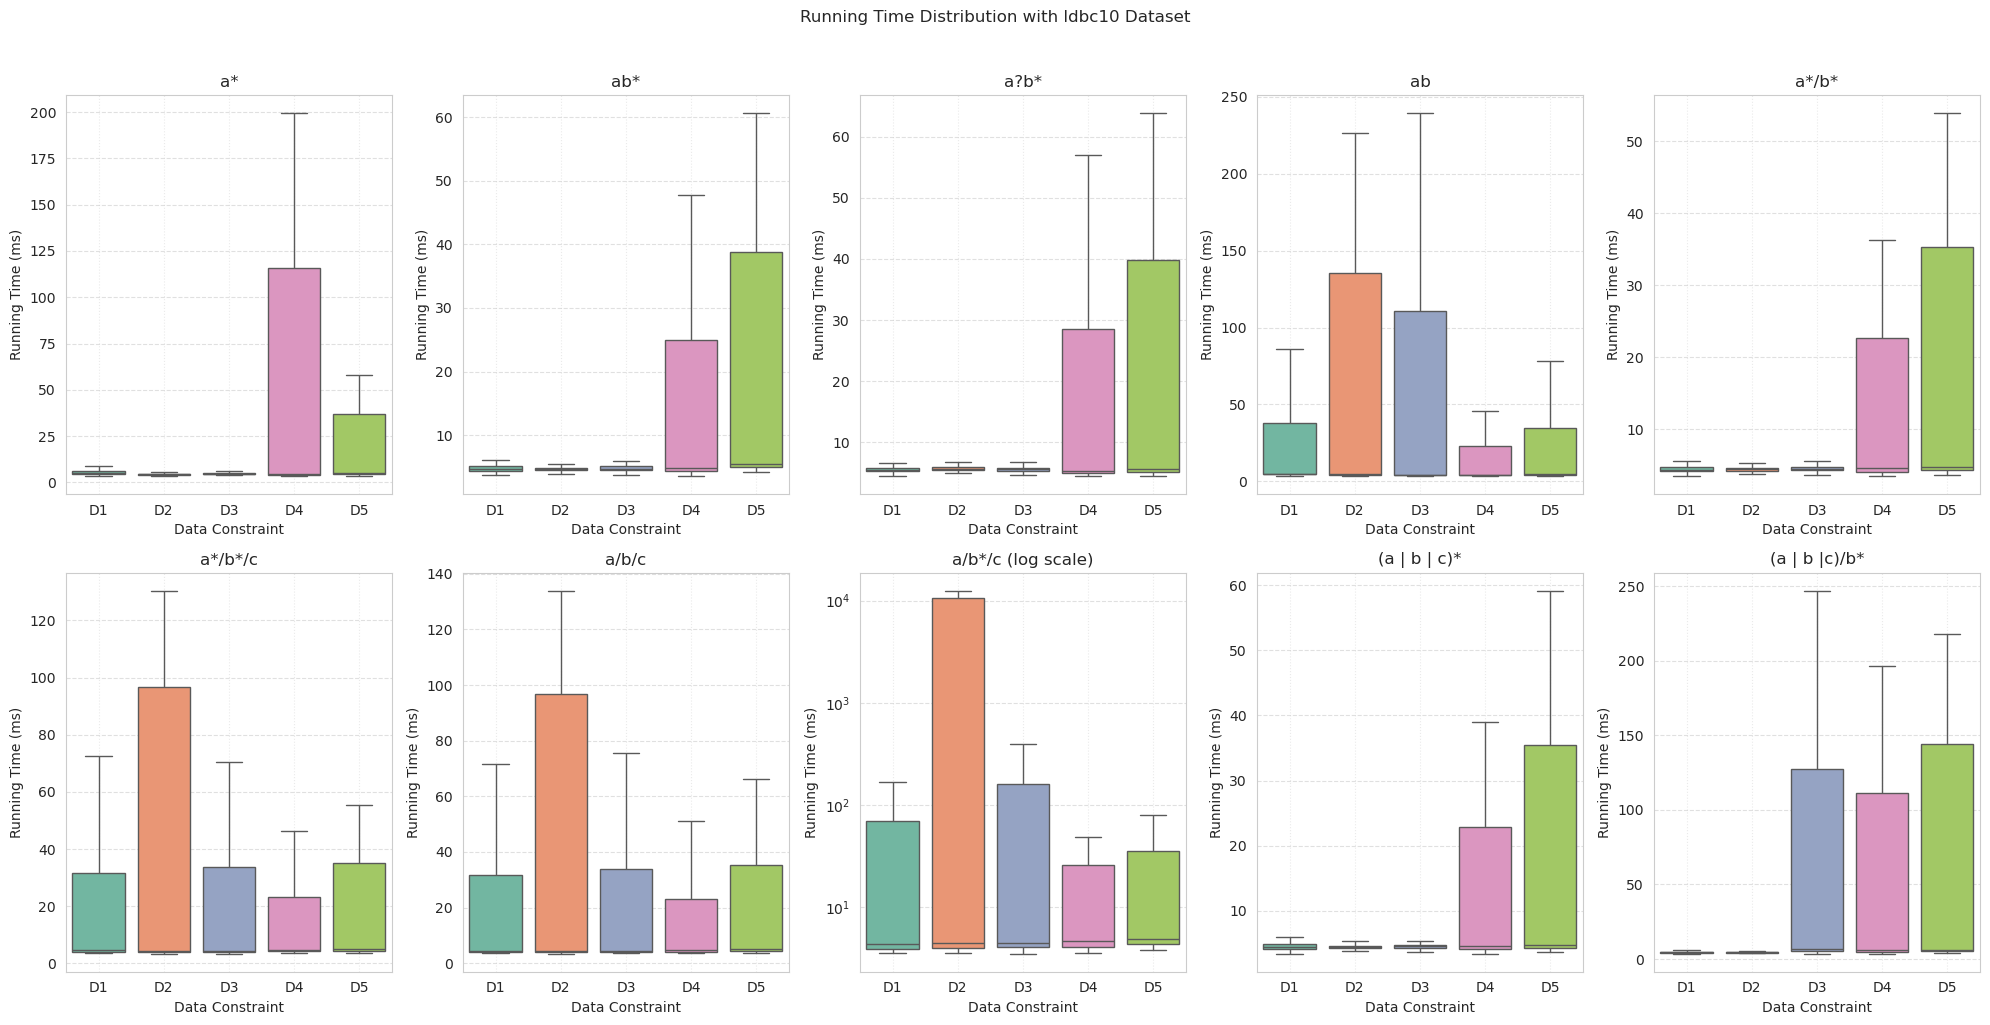

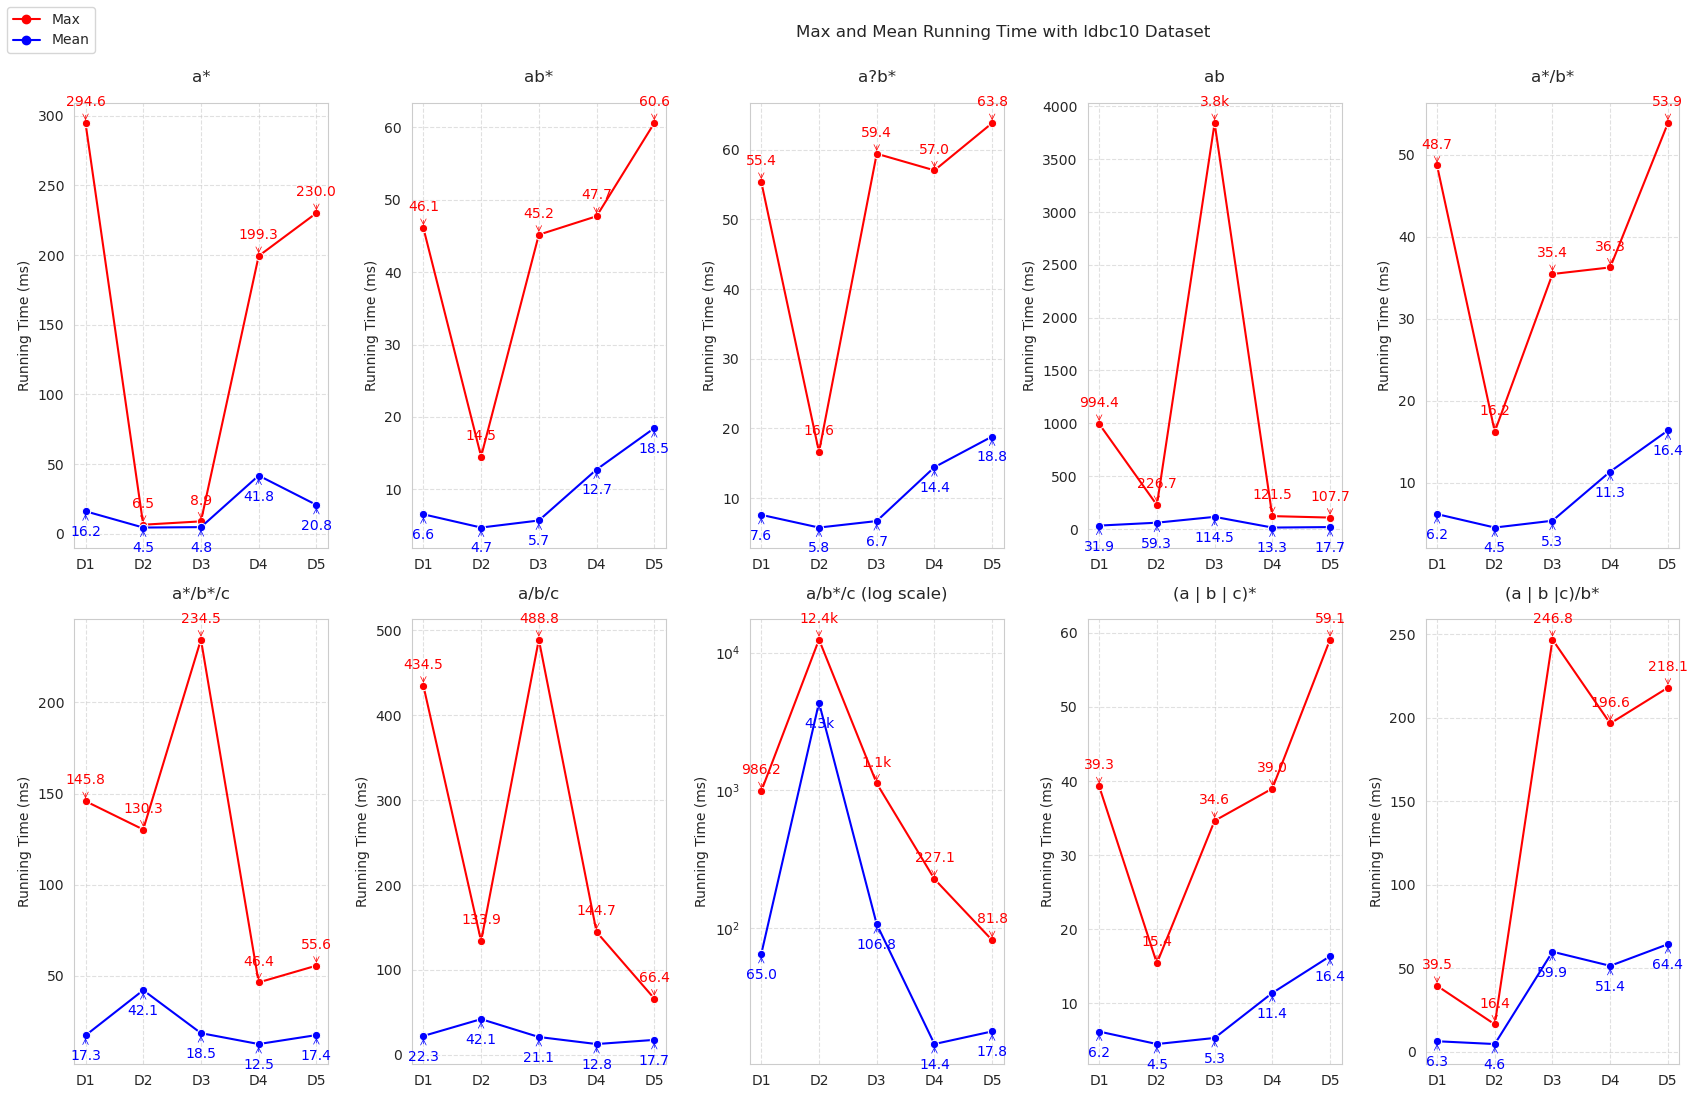

In [3]:

plot_time_performance('telecom-novi/telecom_static.pkl', 'ldbc10', log_scale=True)
plot_max_avg_performance('telecom-novi/telecom_static.pkl', 'ldbc10', log_scale=True)

In [ ]:
def plot_max_avg_performance(path, name, log_scale=True):
    with open(path,"rb+") as f:
        data_ytb = pickle.loads(f.read()) 

    data_groups = []
    for i in range(10):  # Q1-Q10
        id = 0
        for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:  # 5 data types
            if id == 0:  # Skip RPQ
                id += 1
                continue
            data = list(map(lambda x: x, data_ytb[i*6 + id][2]))  # Convert to ms
            id += 1
            data_groups.append((f"{queries[i+1]}", dtype, data))
    
    # Organize data by query groups
    query_groups = {}
    for group, dtype, values in data_groups:
        if group not in query_groups:
            query_groups[group] = []
        query_groups[group].append((dtype, values))
    
    # Calculate number of subplots needed
    num_queries = len(query_groups)
    cols = 5  # Number of columns in subplot grid
    rows = (num_queries + cols - 1) // cols
    
    # Create figure with subplots
    plt.figure(figsize=(20, 5*rows))
    sns.set_style("whitegrid")
    
    for idx, (query, data_list) in enumerate(query_groups.items(), 1):
        ax = plt.subplot(rows, cols, idx)
        
        # Prepare data for this query
        stats = []
        for dtype, values in data_list:
            max_val = np.max(values)
            mean_val = np.mean(values)
            stats.append({
                "Data Constraint": dtype,
                "Max": max_val,
                "Mean": mean_val
            })
        df_stats = pd.DataFrame(stats)
        
        # Check if we need log scale for this subplot
        use_log = False
        if log_scale:
            max_mean = df_stats["Mean"].max()
            min_mean = df_stats["Mean"].min()
            if max_mean / min_mean > 100:  # More than 2 orders of magnitude difference
                use_log = True
        
        # Plot lines for Max and Mean
        sns.lineplot(x="Data Constraint", y="Max", data=df_stats, 
                    color='red', marker='o', label='Max', ax=ax)
        sns.lineplot(x="Data Constraint", y="Mean", data=df_stats, 
                    color='blue', marker='o', label='Mean', ax=ax)
        
            # Calculate dynamic padding based on data range
        y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
        padding = y_range * 0.08  # 8% of y-range as padding    
        for _, row in df_stats.iterrows():
            def format_num(x):
                return f"{x:.1f}" if x < 1000 else f"{x/1000:.1f}k"
            
            # Adjust annotation positions based on values
            max_pos = row["Max"] + padding
            mean_pos = row["Mean"] - padding
            
            # Ensure annotations don't go off the chart
            y_upper = ax.get_ylim()[1]
            if max_pos > y_upper * 0.95:  # Too close to top
                max_pos = row["Max"] - padding
                
            y_lower = ax.get_ylim()[0]
            if mean_pos < y_lower * 0.95:  # Too close to bottom
                mean_pos = row["Mean"] + padding
            
            # Add annotations with arrows for clarity
            ax.annotate(format_num(row["Max"]), 
                       xy=(row["Data Constraint"], row["Max"]),
                       xytext=(15 ,5), textcoords='offset points',
                       color='red', ha='center', va='bottom',
                       arrowprops=dict(arrowstyle='->', color='red', lw=1))
            
            ax.annotate(format_num(row["Mean"]),
                       xy=(row["Data Constraint"], row["Mean"]),
                       xytext=(0, -5), textcoords='offset points',
                       color='blue', ha='center', va='top',
                       arrowprops=dict(arrowstyle='->', color='blue', lw=1))
        if use_log:
            ax.set_yscale("log")
            ax.set_title(f"{query} (log scale)")
        else:
            ax.set_yscale("linear")
            ax.set_title(f"{query}")
        
        ax.set_ylabel("Running Time (ms)")
        ax.yaxis.grid(True, linestyle='--', alpha=0.6)
        ax.xaxis.grid(True, linestyle='dotted', alpha=0.4)
        ax.legend()
        ax.set_xlabel("")
    
    plt.suptitle(f"Max and Mean Running Time with {name} Dataset", y=1.02)
    plt.tight_layout()
    plt.savefig(f'figure/{name}-time-lines.svg', format='svg', dpi=1200, bbox_inches='tight')
    plt.show()


In [ ]:
queries =  {
    1: "a*",
    2: "ab*",
    3: "a?b*",
    4: "ab",
    5: "a*/b*",
    6: "a*/b*/c",
    7: "a/b/c",
    8: "a/b*/c",
    9: "(a | b | c)*", 
    10: "(a | b |c)/b*"
}
def plot_max_comparison(path, path2, name1, name2, log_scale=True):
    # Load both datasets
    with open(path, "rb+") as f:
        data1 = pickle.loads(f.read())
    with open(path2, "rb+") as f:
        data2 = pickle.loads(f.read())
    
    # Process both datasets
    data_groups = []
    for dataset, name in [(data1, name1), (data2, name2)]:
        for i in range(10):  # Q1-Q10
            id = 0
            for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
                if id == 0:
                    id += 1
                    continue
                data = list(map(lambda x: x, dataset[i*6 + id][2]))
                id += 1
                data_groups.append((f"{queries[i+1]}", dtype, name, data))
    
    # Prepare max values for plotting
    plot_data = []
    for group, dtype, dataset_name, values in data_groups:
        plot_data.append({
            'Query': group,
            'Data Constraint': dtype,
            'Dataset': dataset_name,
            'Max': np.max(values)
        })
    df = pd.DataFrame(plot_data)
    
    # Create subplots
    num_queries = len(queries)
    cols = 5
    rows = (num_queries + cols - 1) // cols
    plt.figure(figsize=(20, 5*rows))
    sns.set_style("whitegrid")
    
    for idx, query in enumerate(queries.values(), 1):
        ax = plt.subplot(rows, cols, idx)
        query_df = df[df['Query'] == query]
        
        # Plot max values as lines
        sns.lineplot(data=query_df, x='Data Constraint', y='Max', 
                    hue='Dataset', style='Dataset',
                    markers=True, dashes=False, ax=ax,
                    markersize=8, linewidth=2.5)
        ax.get_legend().remove() 
        
        ax.set_title(f"Max: {query}")
        ax.set_xlabel("Data Constraint")
        ax.set_ylabel("Time (ms)")
        plt.xticks(rotation=45)
        
        # Check for log scale
        max_val = query_df['Max'].max()
        min_val = query_df['Max'].min()
        if log_scale and max_val / min_val > 100:
            ax.set_yscale("log")
            ax.set_title(f"Max: {query} (log scale)")
    
    plt.suptitle(f"Maximum Running Time Comparison: {name1} vs {name2}", y=1.02)
    handles, labels = ax.get_legend_handles_labels()

    # Create single legend above all subplots
    plt.figlegend(handles, labels, loc='upper left', 
                bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'figure/{name1}-vs-{name2}-max-comparison.svg', 
                format='svg', dpi=1200, bbox_inches='tight')
    plt.show()
def plot_mean_comparison(path, path2, name1, name2, log_scale=True):
    # Load both datasets
    with open(path, "rb+") as f:
        data1 = pickle.loads(f.read())
    with open(path2, "rb+") as f:
        data2 = pickle.loads(f.read())
    
    # Process both datasets
    data_groups = []
    for dataset, name in [(data1, name1), (data2, name2)]:
        for i in range(10):  # Q1-Q10
            id = 0
            for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
                if id == 0:
                    id += 1
                    continue
                data = list(map(lambda x: x, dataset[i*6 + id][2]))
                id += 1
                data_groups.append((f"{queries[i+1]}", dtype, name, data))
    
    # Prepare mean values for plotting
    plot_data = []
    for group, dtype, dataset_name, values in data_groups:
        plot_data.append({
            'Query': group,
            'Data Constraint': dtype,
            'Dataset': dataset_name,
            'Mean': np.mean(values)
        })
    df = pd.DataFrame(plot_data)
    
    # Create subplots
    num_queries = len(queries)
    cols = 5
    rows = (num_queries + cols - 1) // cols
    plt.figure(figsize=(20, 5*rows))
    sns.set_style("whitegrid")
    
    for idx, query in enumerate(queries.values(), 1):
        ax = plt.subplot(rows, cols, idx)
        query_df = df[df['Query'] == query]
        
        # Plot mean values as lines
        sns.lineplot(data=query_df, x='Data Constraint', y='Mean', 
                    hue='Dataset', style='Dataset',
                    markers=True, dashes=False, ax=ax,
                    markersize=8, linewidth=2.5)
        ax.get_legend().remove() 
        
        ax.set_title(f"Mean: {query}")
        ax.set_xlabel("Data Constraint")
        ax.set_ylabel("Time (ms)")
        plt.xticks(rotation=45)
        
        # Check for log scale
        max_val = query_df['Mean'].max()
        min_val = query_df['Mean'].min()
        if log_scale and max_val / min_val > 100:
            ax.set_yscale("log")
            ax.set_title(f"Mean: {query} (log scale)")
    
    plt.suptitle(f"Average Running Time Comparison: {name1} vs {name2}", y=1.02)
    handles, labels = ax.get_legend_handles_labels()

    # Create single legend above all subplots
    plt.figlegend(handles, labels, loc='upper left', 
                bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'figure/{name1}-vs-{name2}-mean-comparison.svg', 
                format='svg', dpi=1200, bbox_inches='tight')
    plt.show()

def plot_timeout_comparison(path, path2, name1, name2, timeout, log_scale=True):
    # Load both datasets
    with open(path, "rb+") as f:
        data1 = pickle.loads(f.read())
    with open(path2, "rb+") as f:
        data2 = pickle.loads(f.read())
    
    # Process both datasets
    data_groups = []
    for dataset, name in [(data1, name1), (data2, name2)]:
        for i in range(10):  # Q1-Q10
            id = 0
            for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:
                if id == 0:
                    id += 1
                    continue
                data = list(map(lambda x: x, dataset[i*6 + id][2]))
                id += 1
                data_groups.append((f"{queries[i+1]}", dtype, name, data))
    
    # Prepare mean values for plotting
    plot_data = []
    for group, dtype, dataset_name, values in data_groups:
        plot_data.append({
            'Query': group,
            'Data Constraint': dtype,
            'Dataset': dataset_name,
            'TimeOut': len(list(filter(lambda x: (x/1000) > timeout, values)))
        })
    df = pd.DataFrame(plot_data)
    
    # Create subplots
    num_queries = len(queries)
    cols = 5
    rows = (num_queries + cols - 1) // cols
    plt.figure(figsize=(20, 5*rows))
    sns.set_style("whitegrid")
    
    for idx, query in enumerate(queries.values(), 1):
        ax = plt.subplot(rows, cols, idx)
        query_df = df[df['Query'] == query]
        
        # Plot mean values as lines
        sns.lineplot(data=query_df, x='Data Constraint', y='TimeOut', 
                    hue='Dataset', style='Dataset',
                    markers=True, dashes=False, ax=ax,
                    markersize=8, linewidth=2.5)
        ax.get_legend().remove() 
        ax.set_title(f"{query}/Timeout Threshold:{timeout}s")
        ax.set_xlabel("Data Constraint")
        ax.set_ylabel("Number of Time Out Queries")
        # ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.6f}%"))
        plt.xticks(rotation=45)
        
        # # Check for log scale
        # max_val = query_df['Timeout'].max()
        # min_val = query_df['Mean'].min()
        # if log_scale and max_val / min_val > 100:
        #     ax.set_yscale("log")
        #     ax.set_title(f"Mean: {query} (log scale)")
    
    plt.suptitle(f"Timeout Comparison: {name1} vs {name2}", y=1.02)
# Get handles/labels from last subplot (they're the same for all)
    handles, labels = ax.get_legend_handles_labels()

    # Create single legend above all subplots
    plt.figlegend(handles, labels, loc='upper left', 
                bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'figure/{name1}-vs-{name2}-timeout-comparison.svg', 
                format='svg', dpi=1200, bbox_inches='tight')
    plt.show()

def plot_compare(path1, path2, name, timeout, log=True):
    plot_max_comparison(path1, path2, f"{name}-Optimized", f"{name}-Naive", log)
    plot_mean_comparison(path1, path2, f"{name}-Optimized", f"{name}-Naive", log)
    plot_timeout_comparison(path1, path2, f"{name}-Optimized", f"{name}-Naive", timeout)


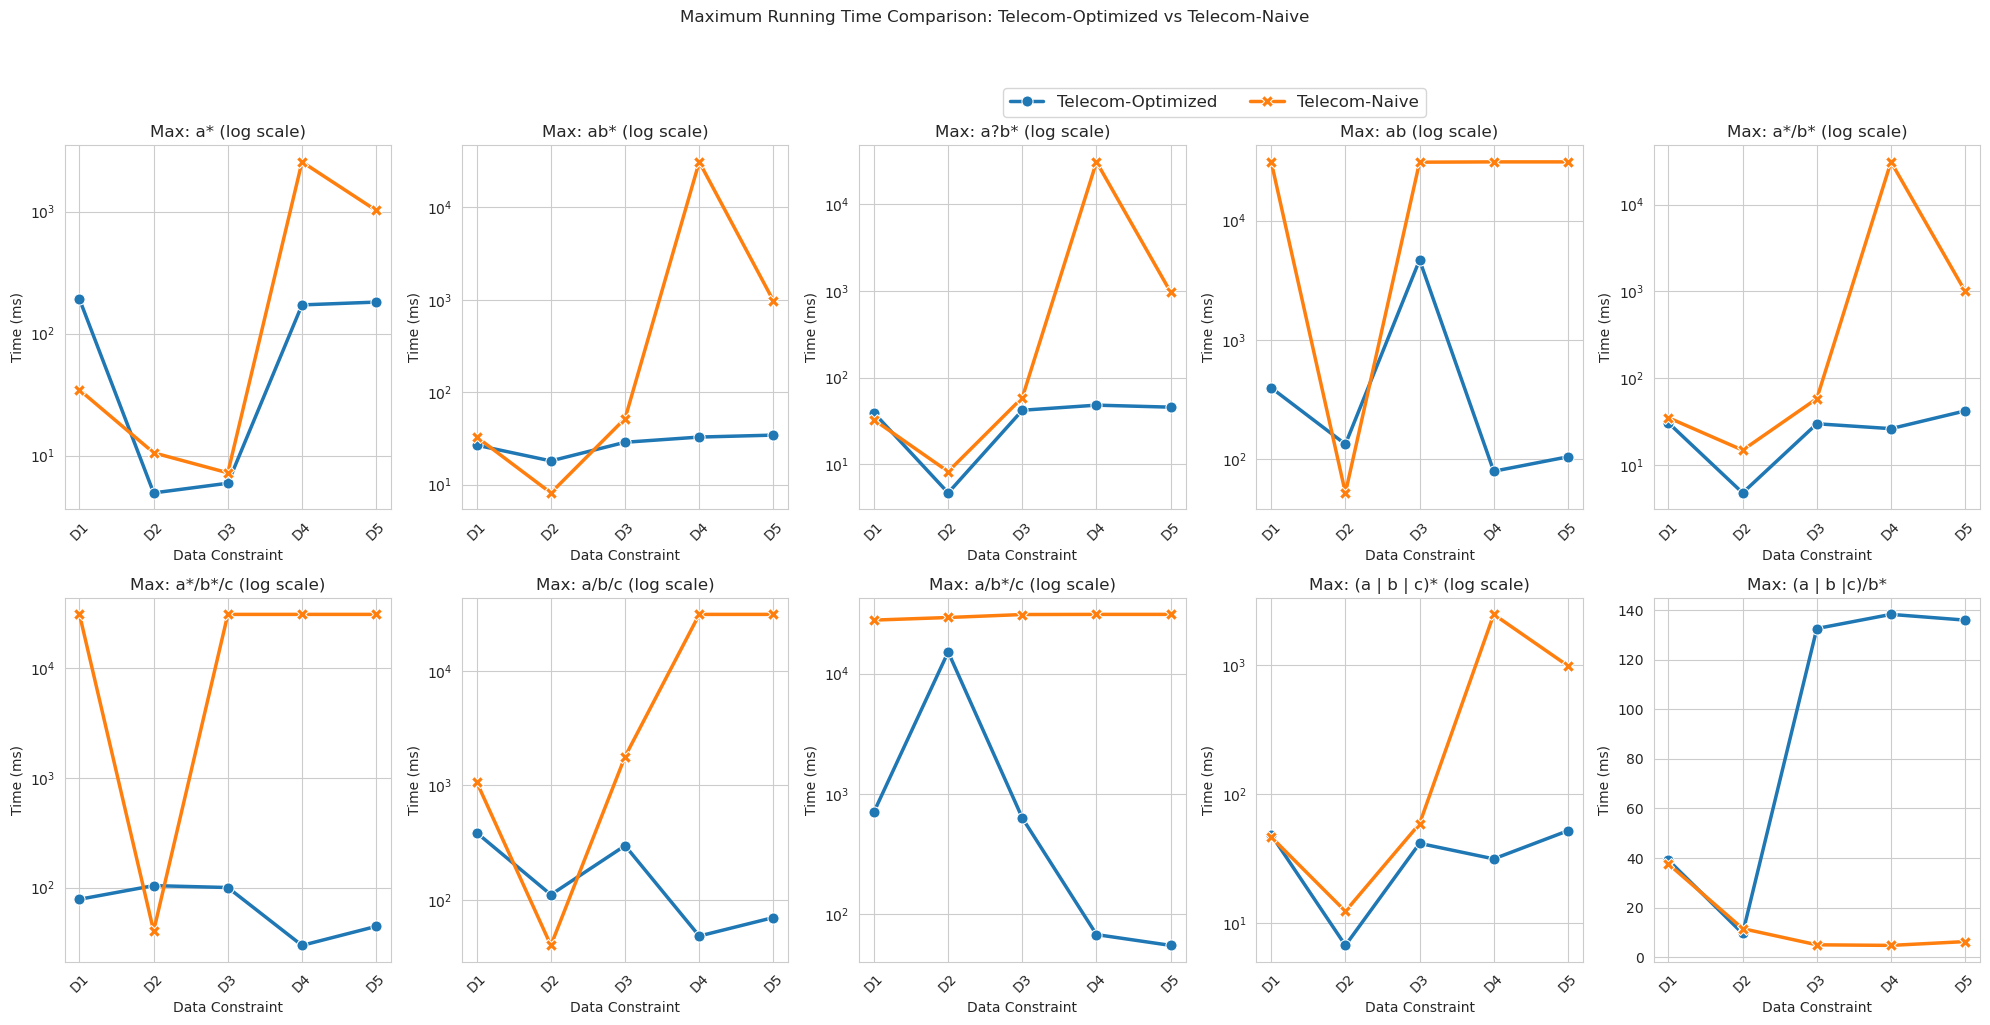

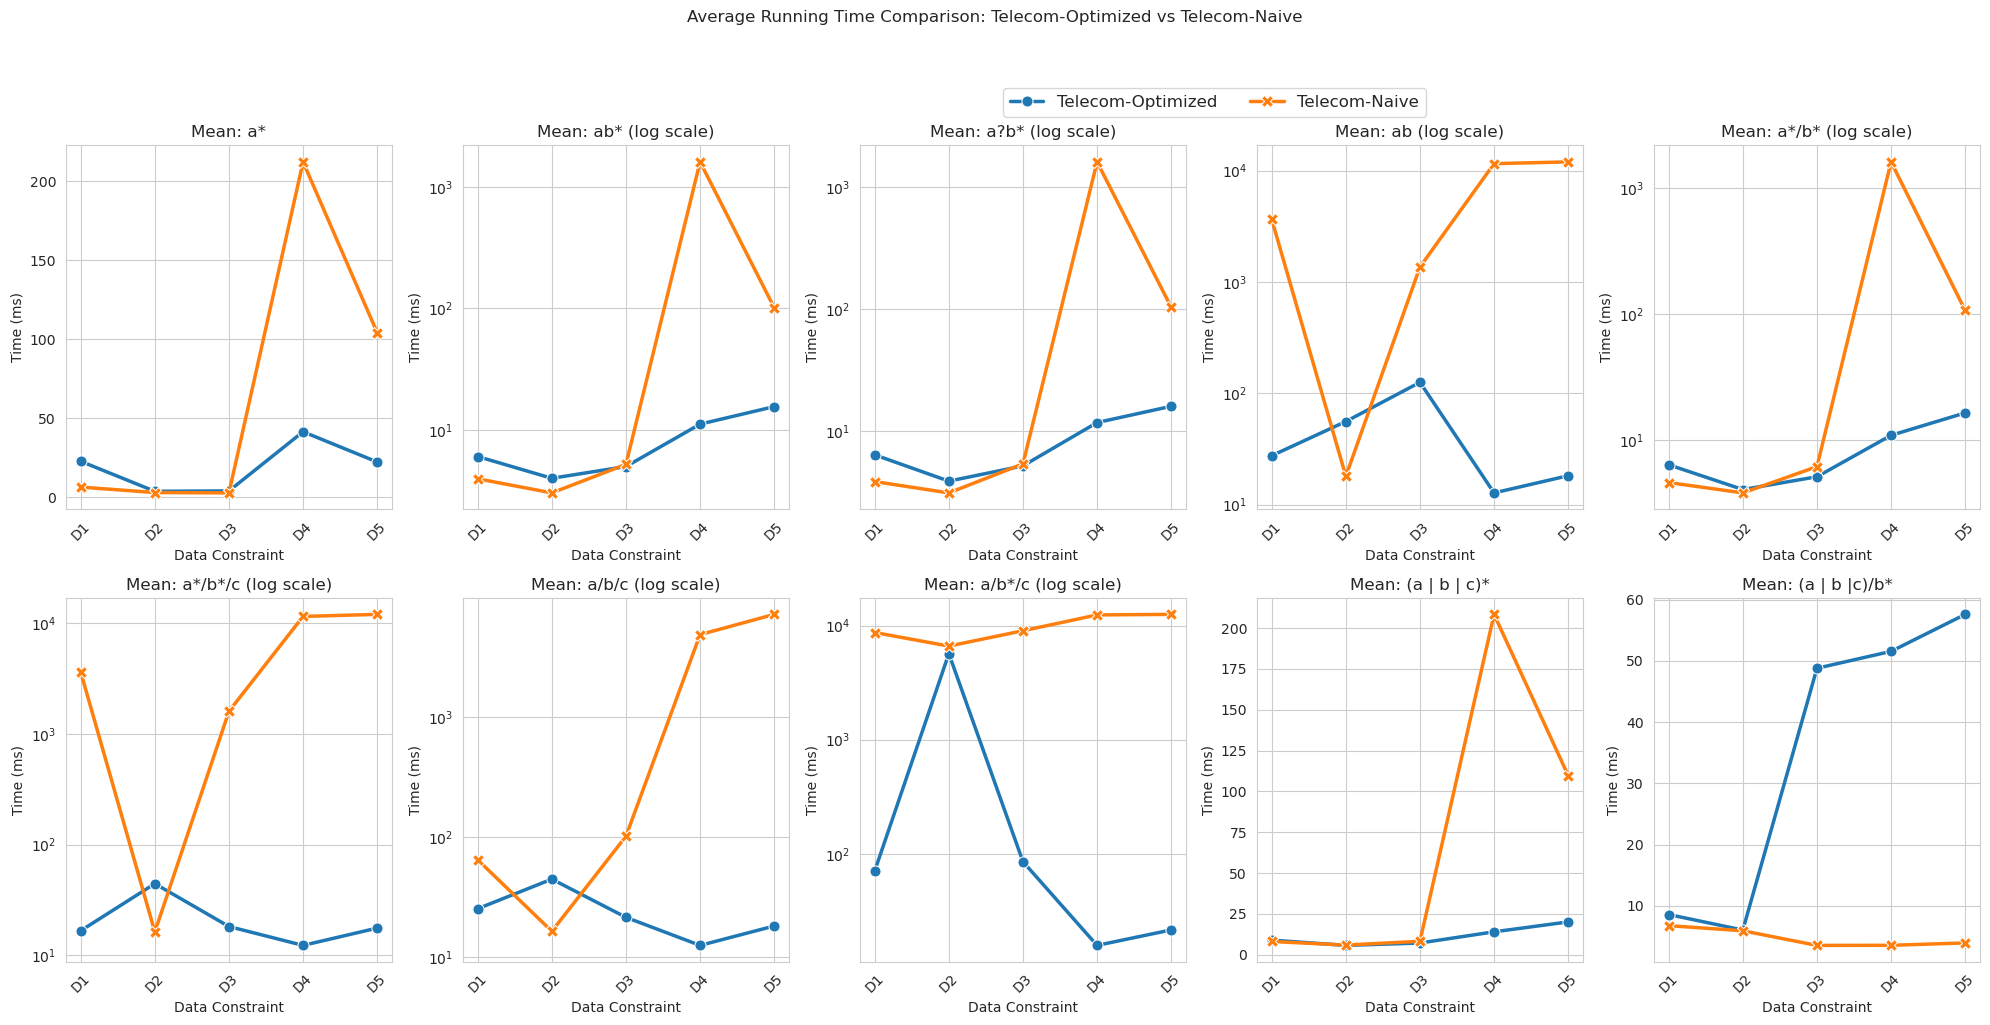

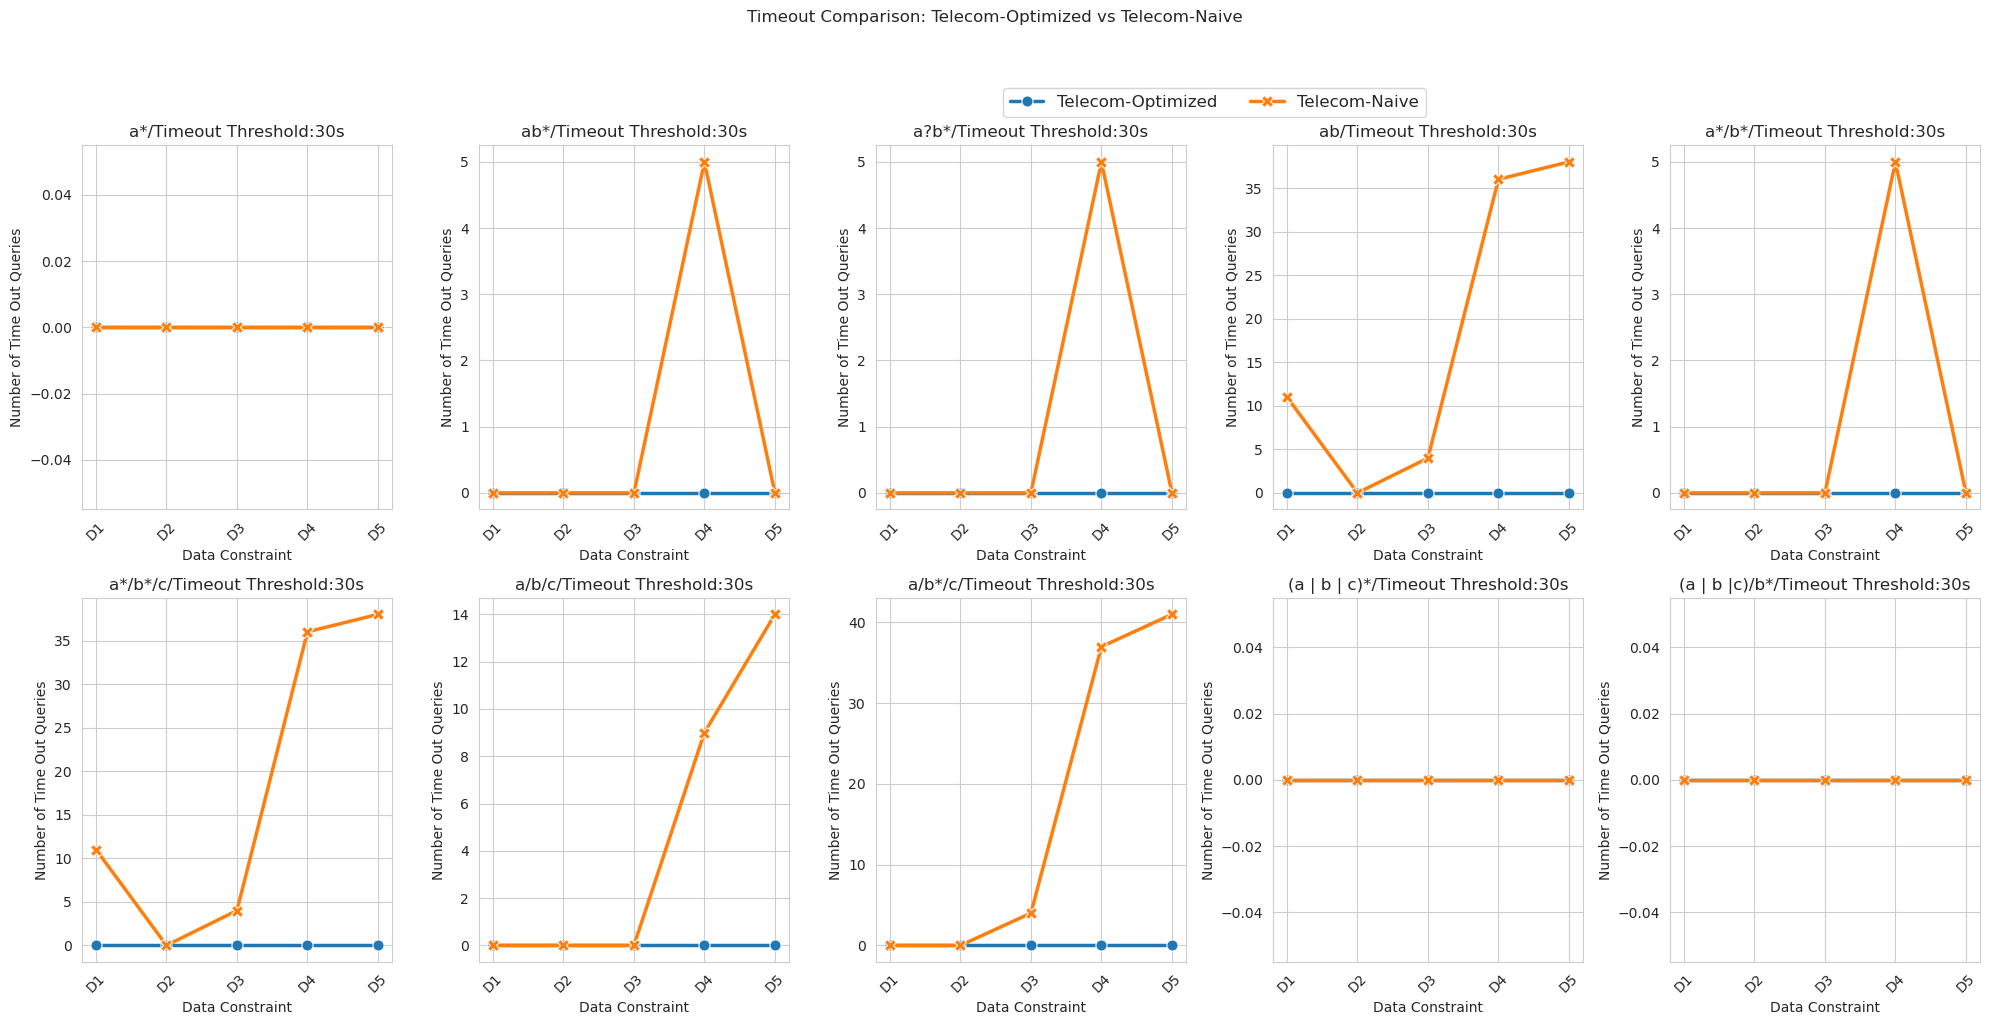

In [32]:
plot_compare("optimized-100/telecom/telecom_static.pkl", "naive/telecom-100/telecom_naive_static.pkl", "Telecom", 30)

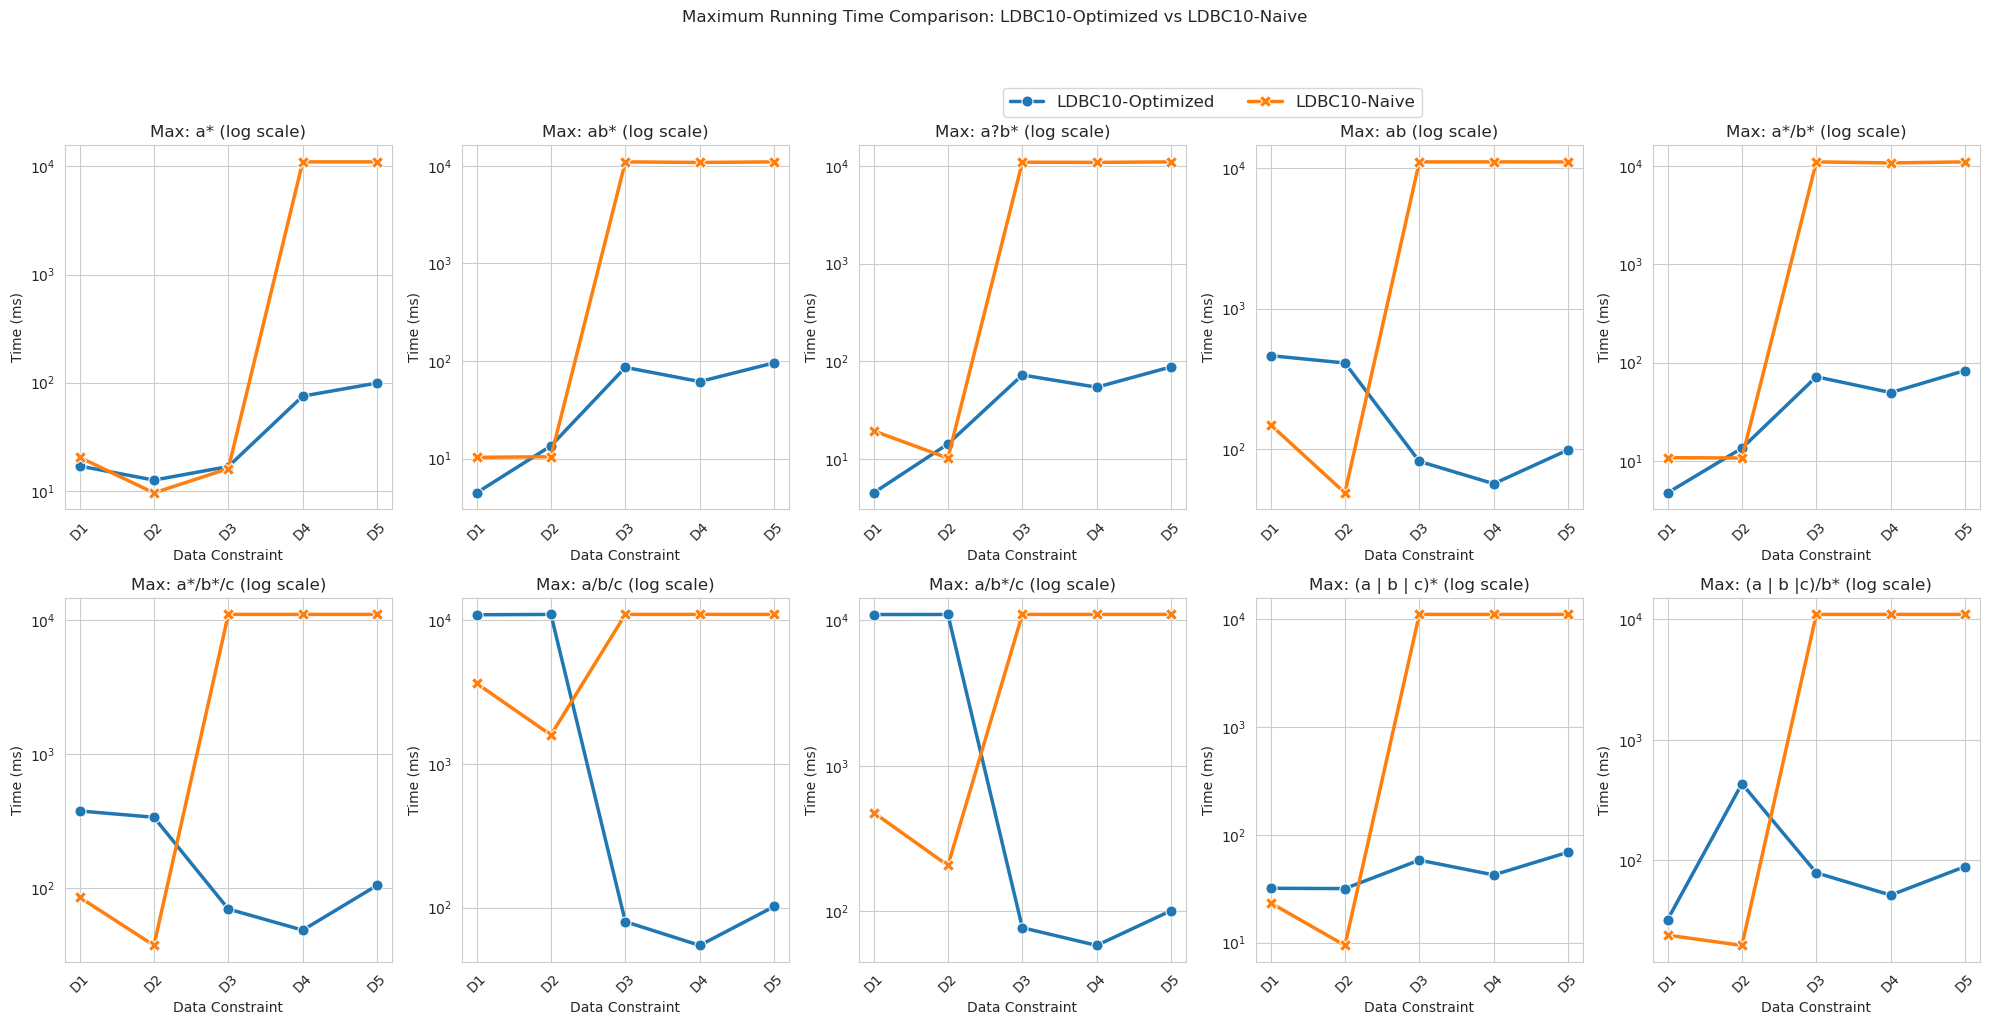

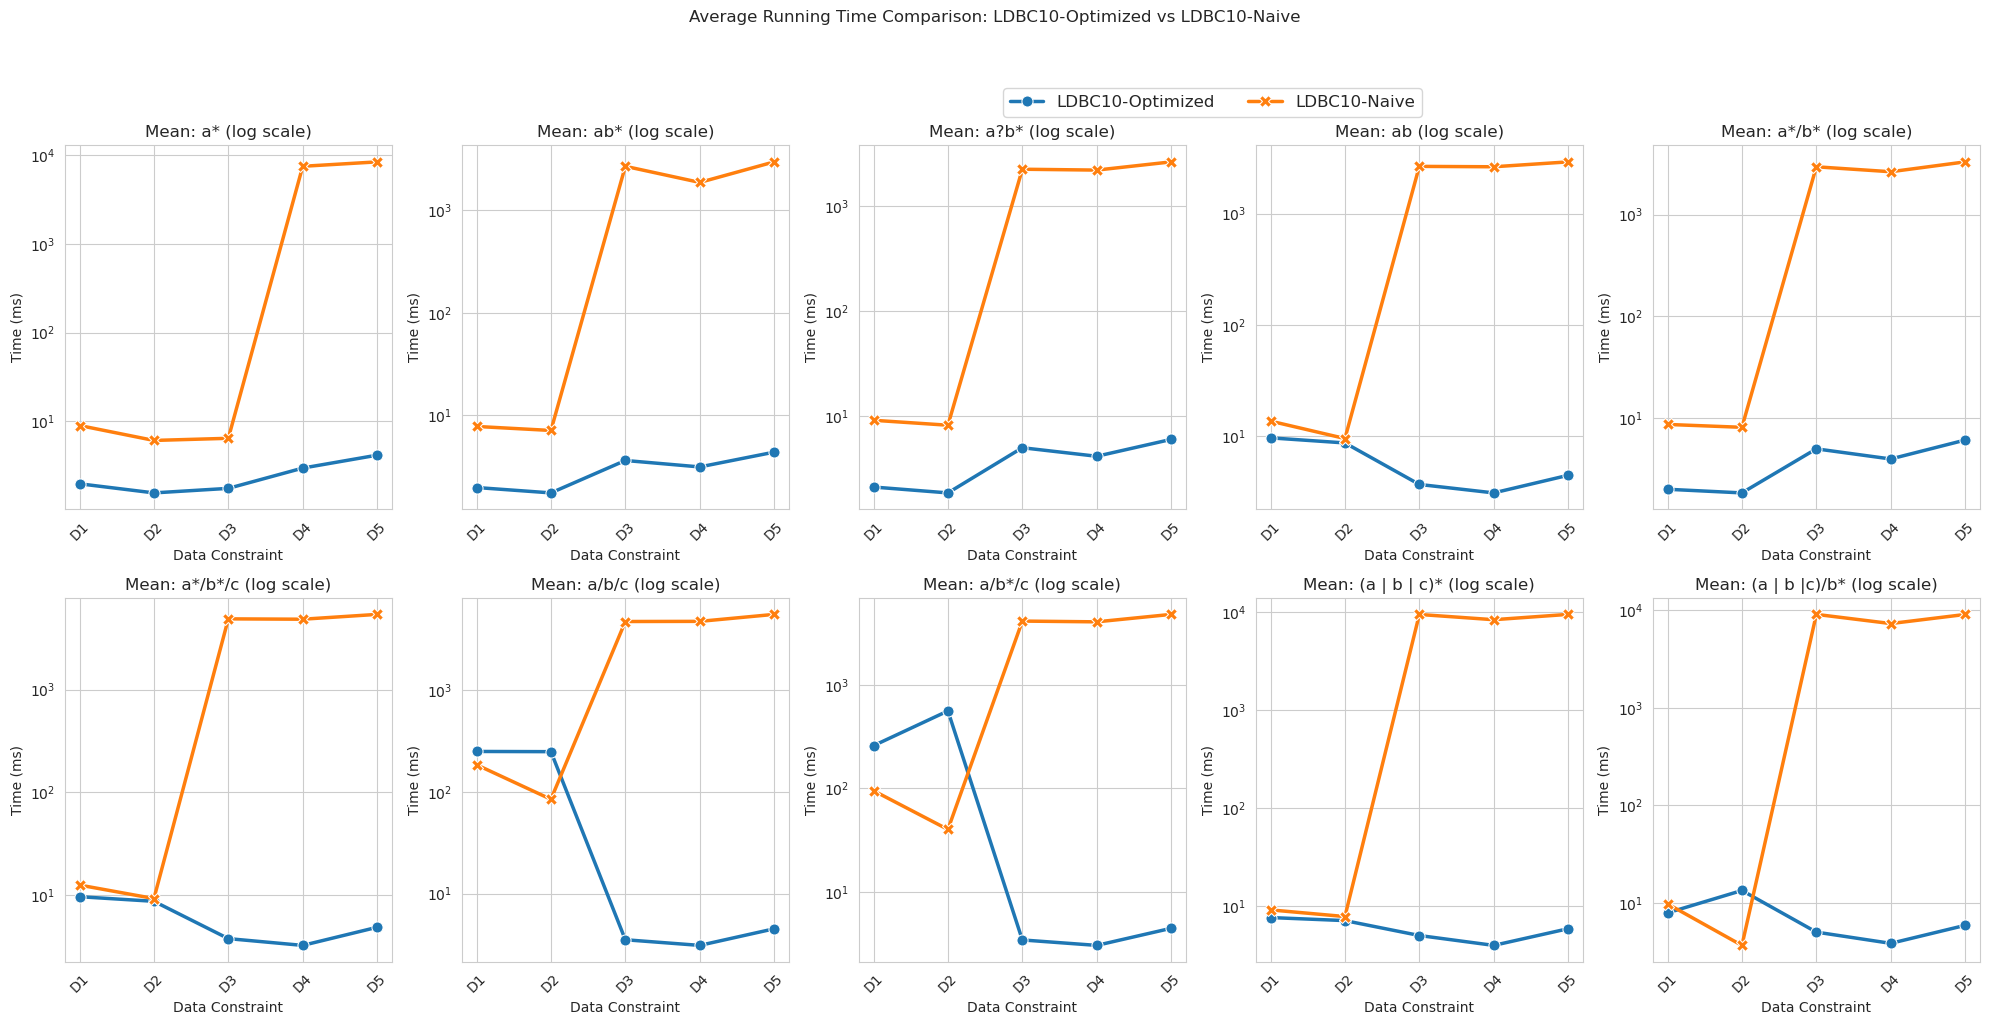

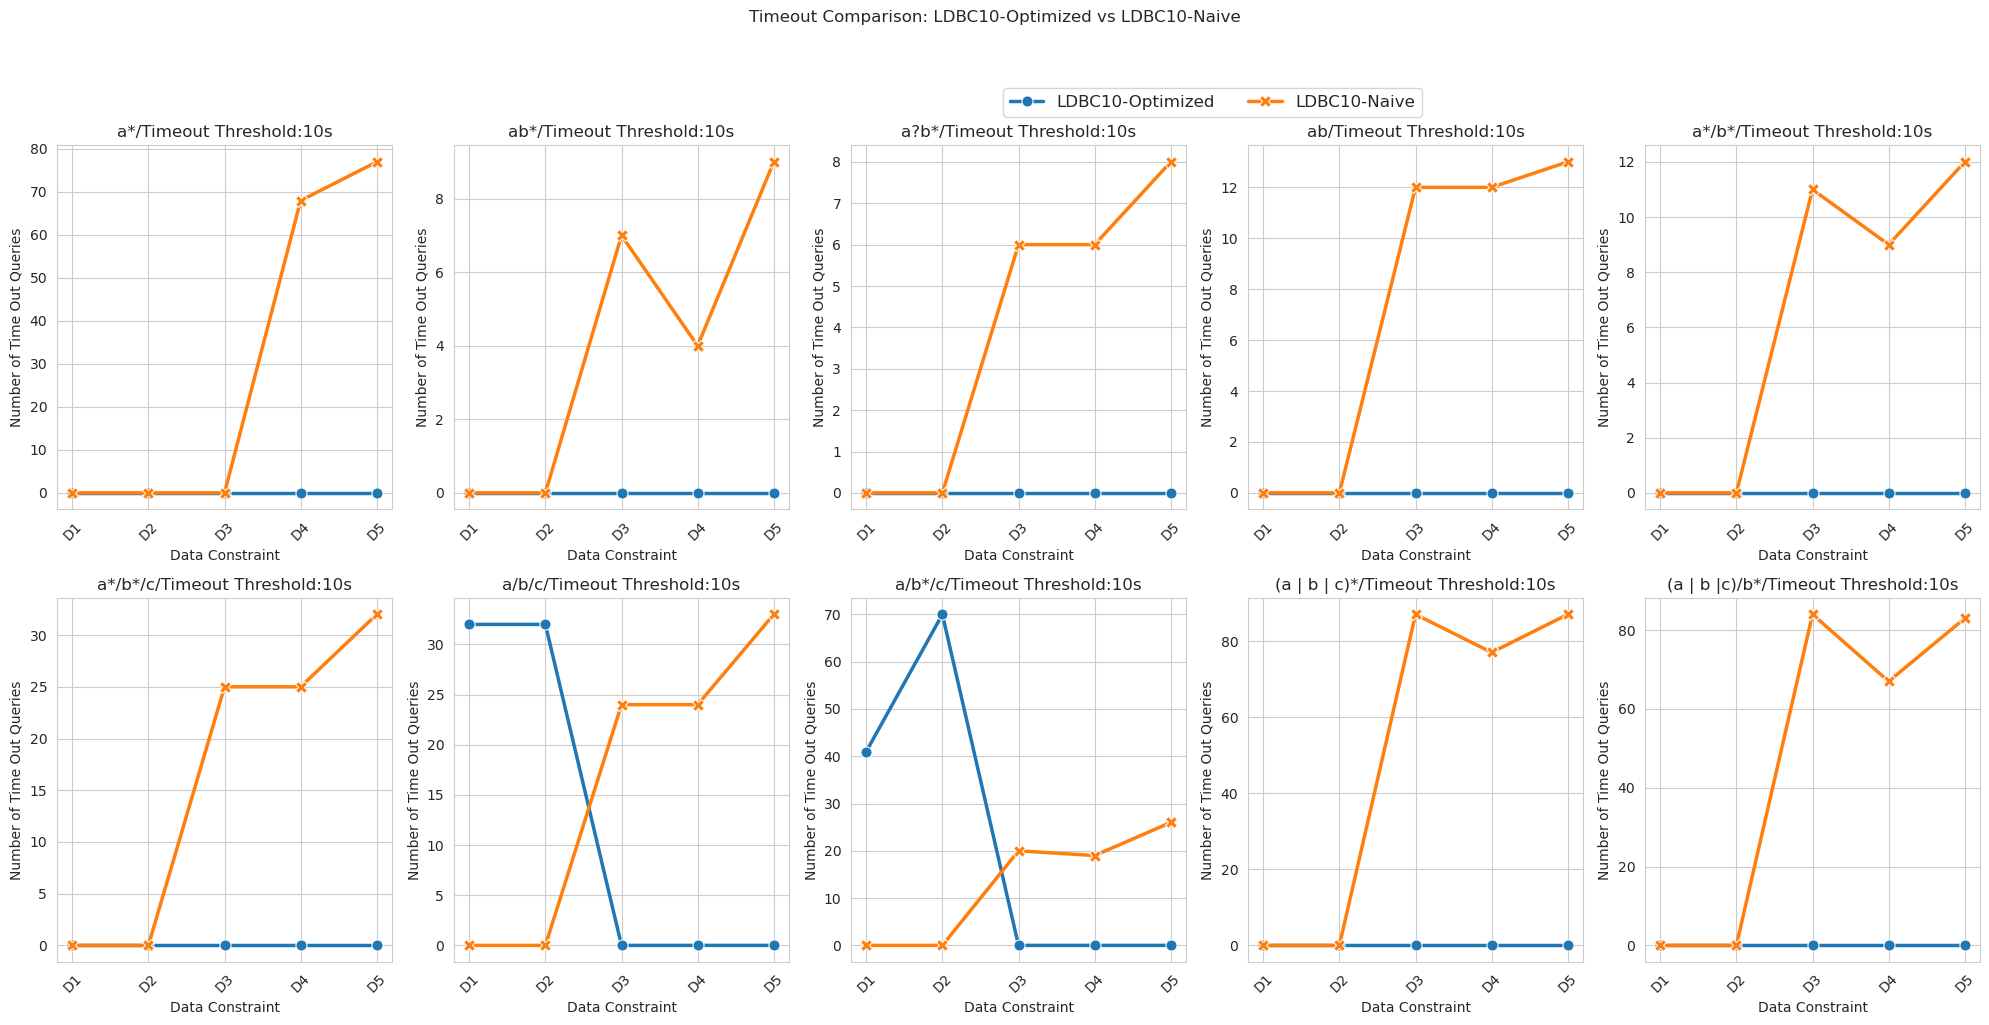

In [33]:
plot_compare("ldbc10/ldbc10_static.pkl", "naive/LDBC-10/ldbc10_naive_static.pkl", "LDBC10", 10)

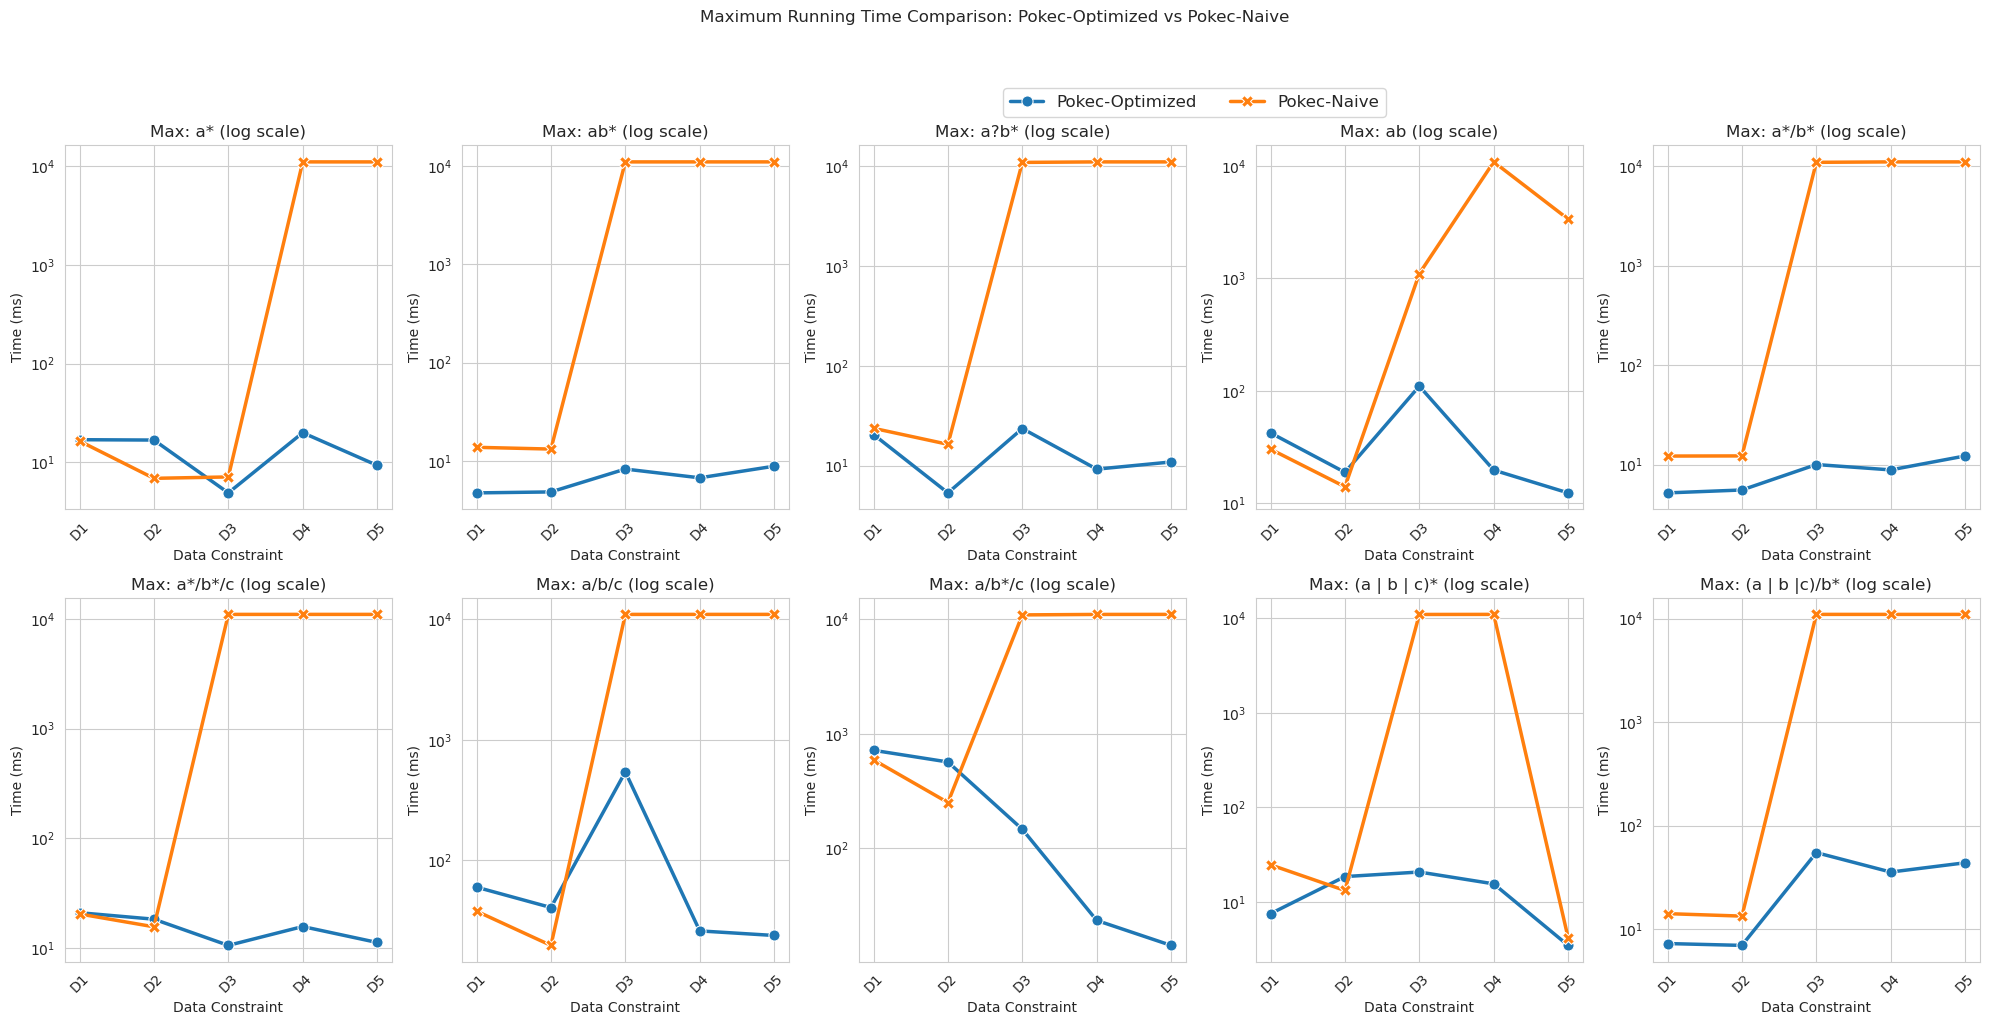

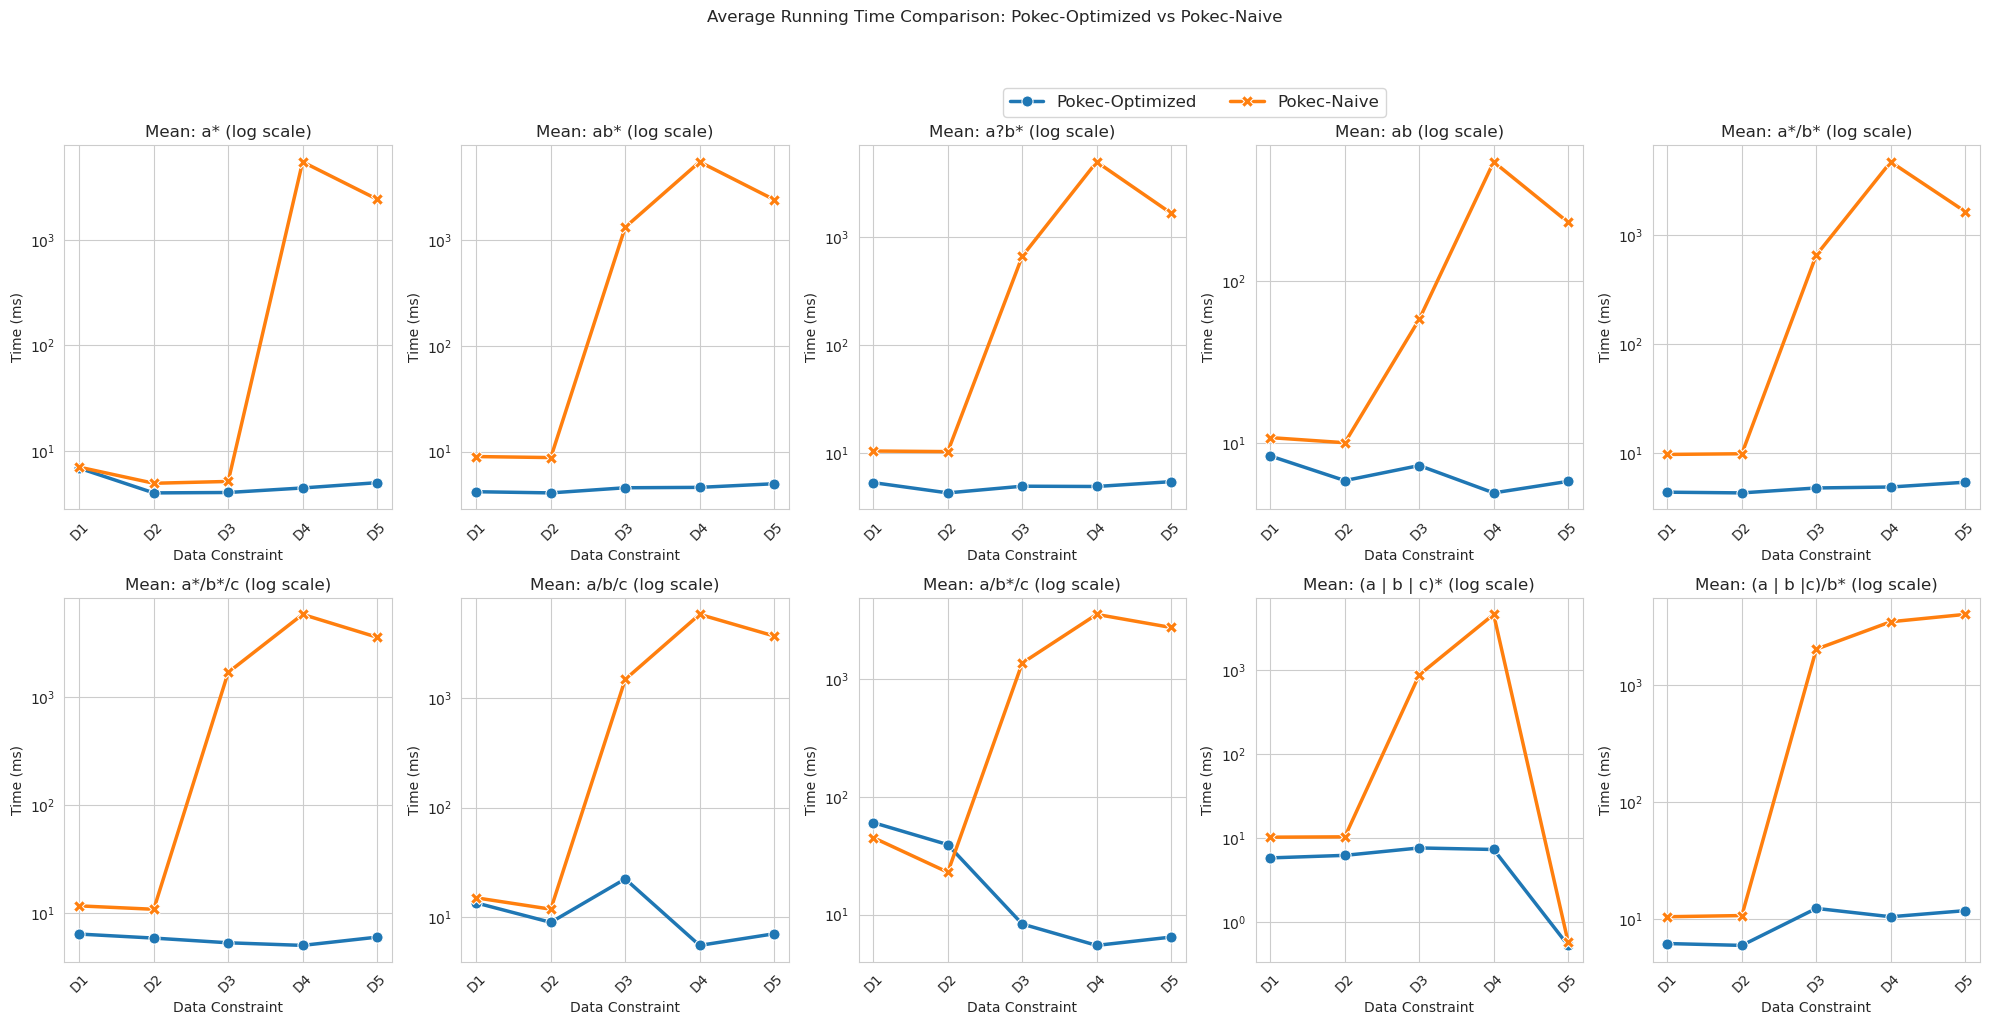

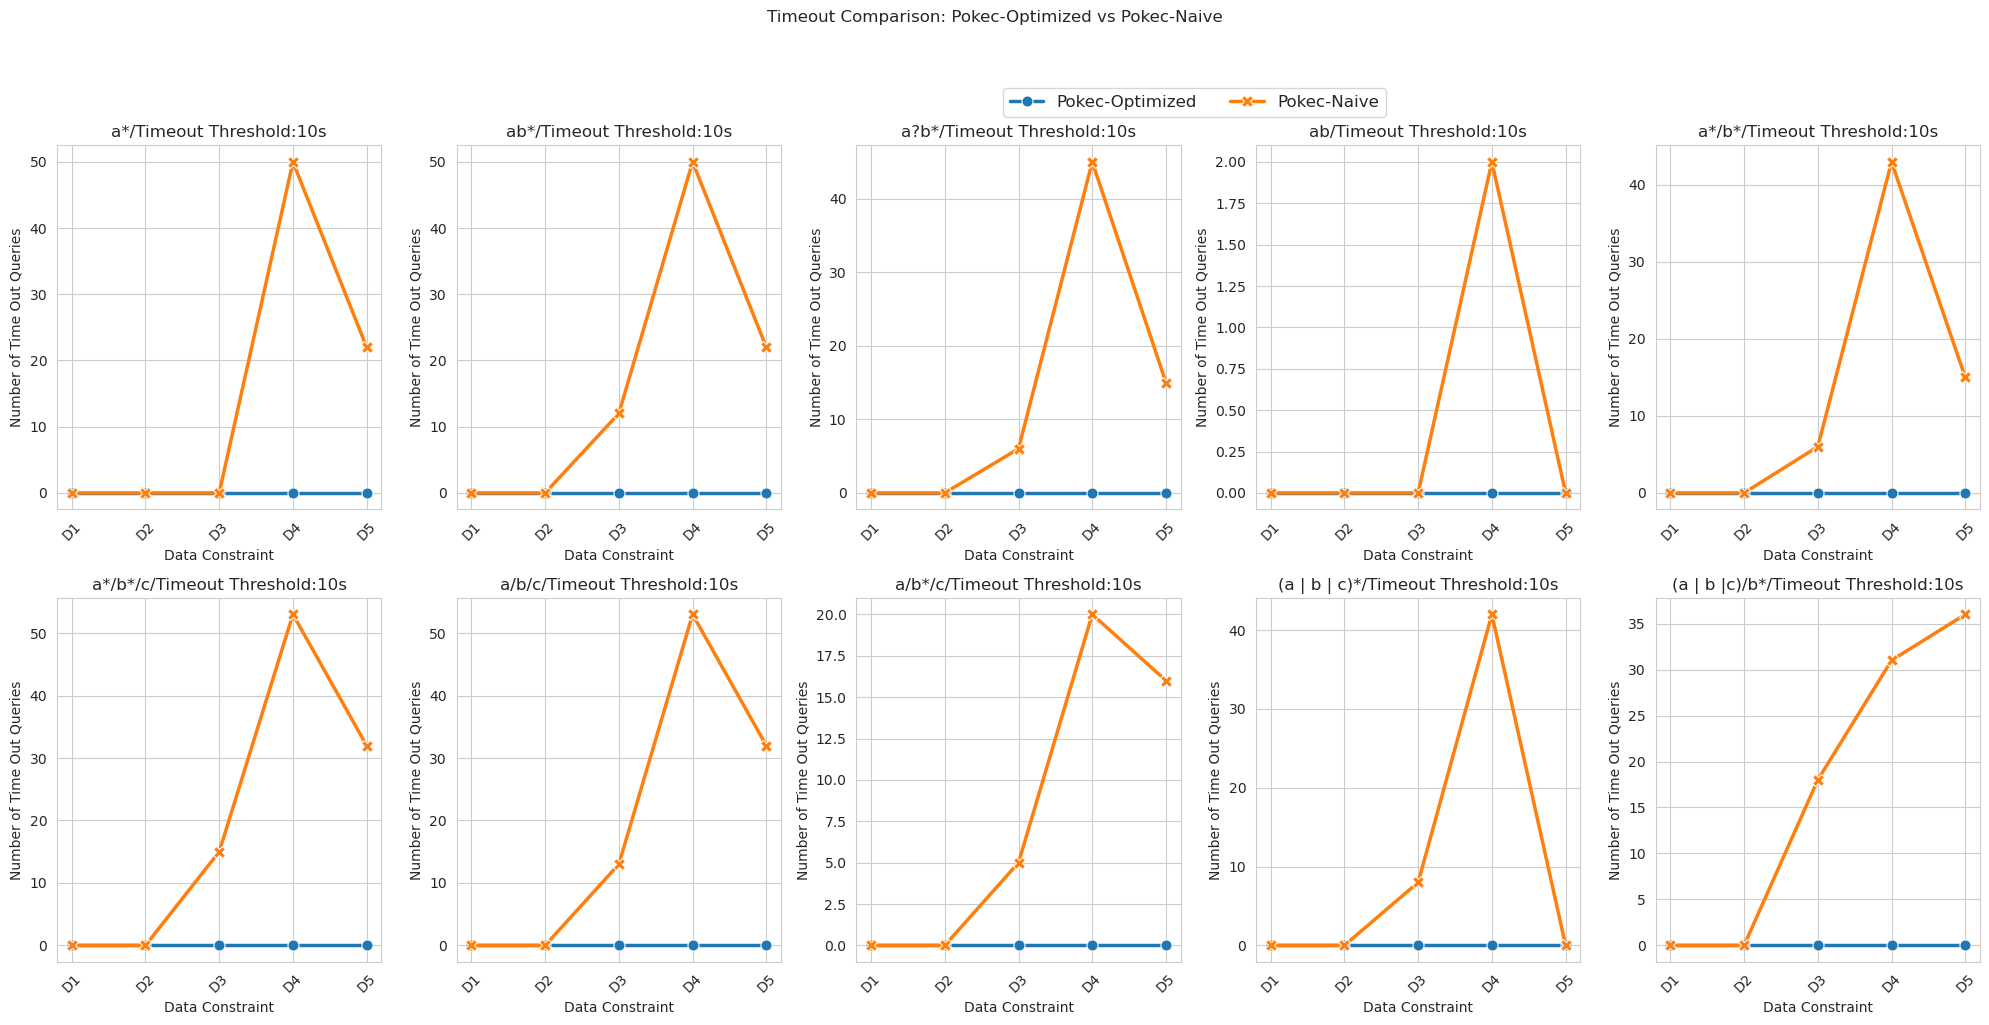

In [38]:
plot_compare("optimized-100/pokec/pokec_static.pkl", "naive/pokec-100/pokec_static_naive.pkl", "Pokec", 10)

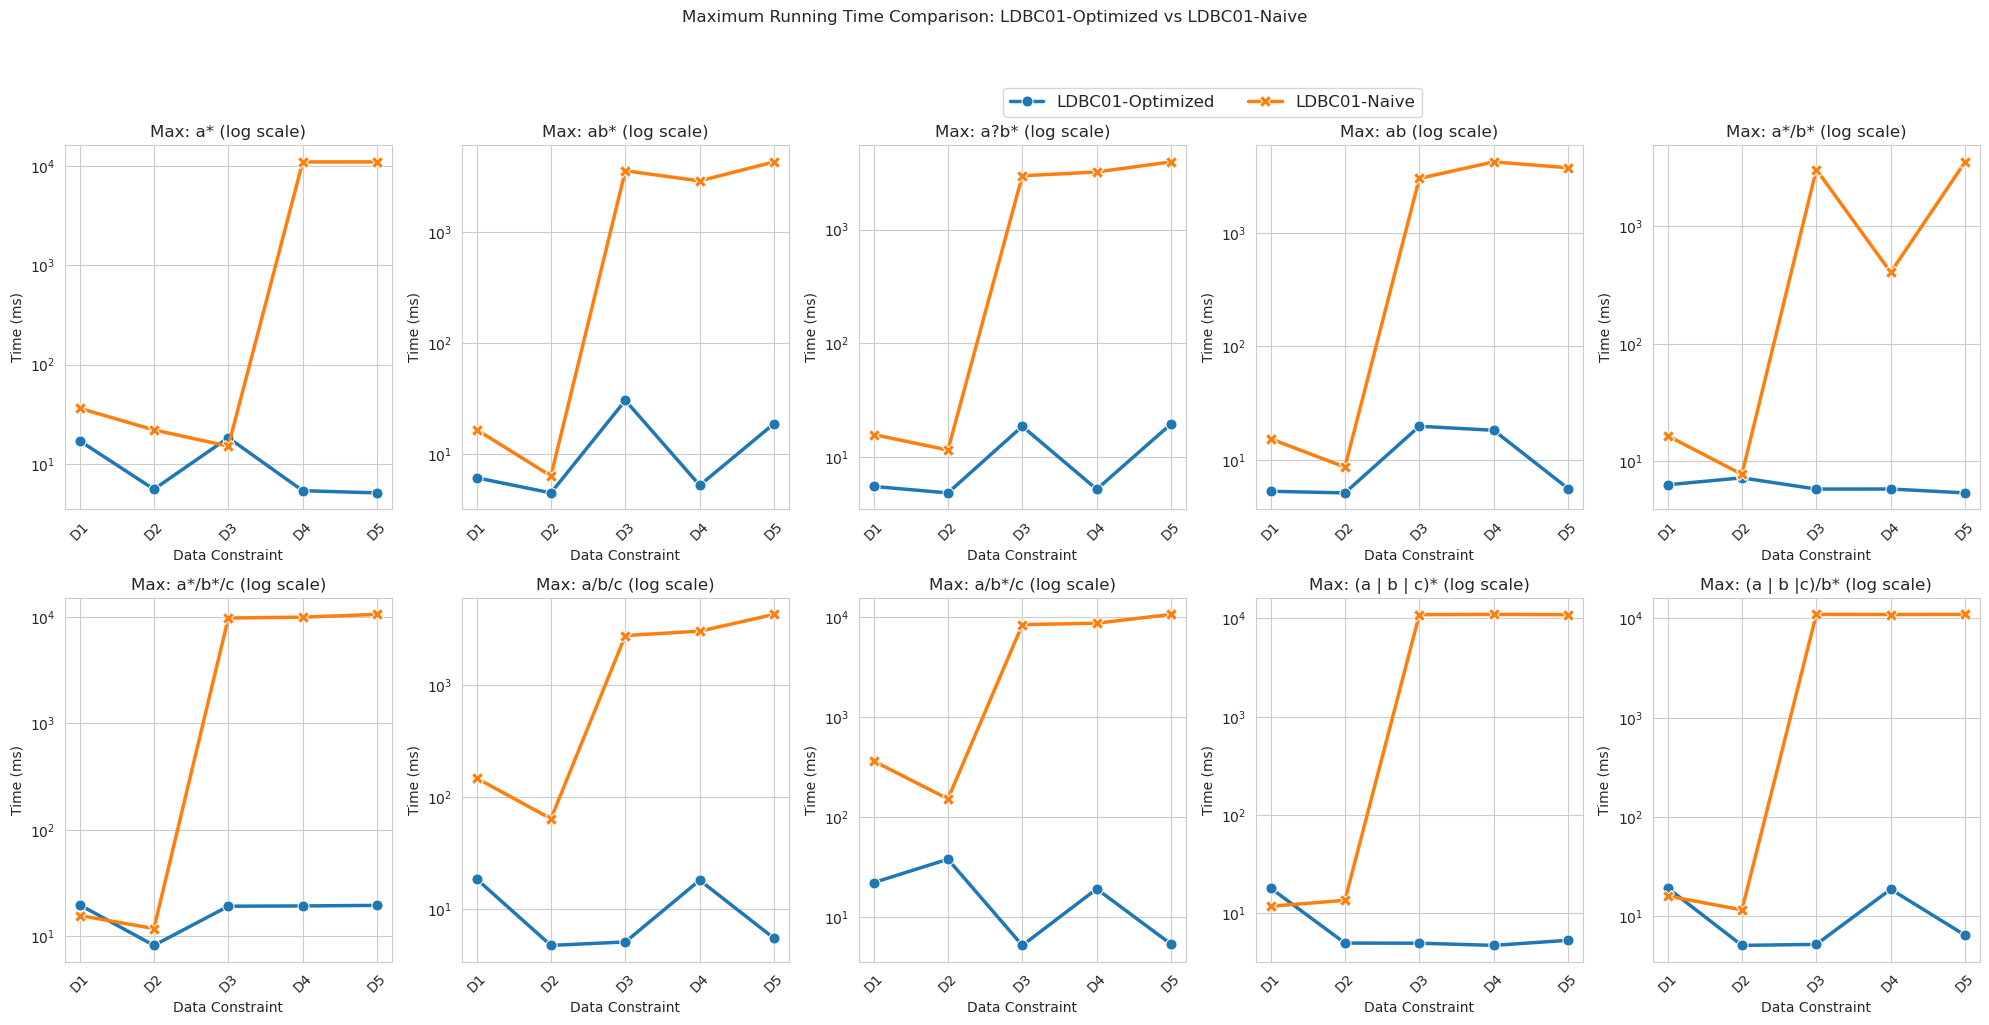

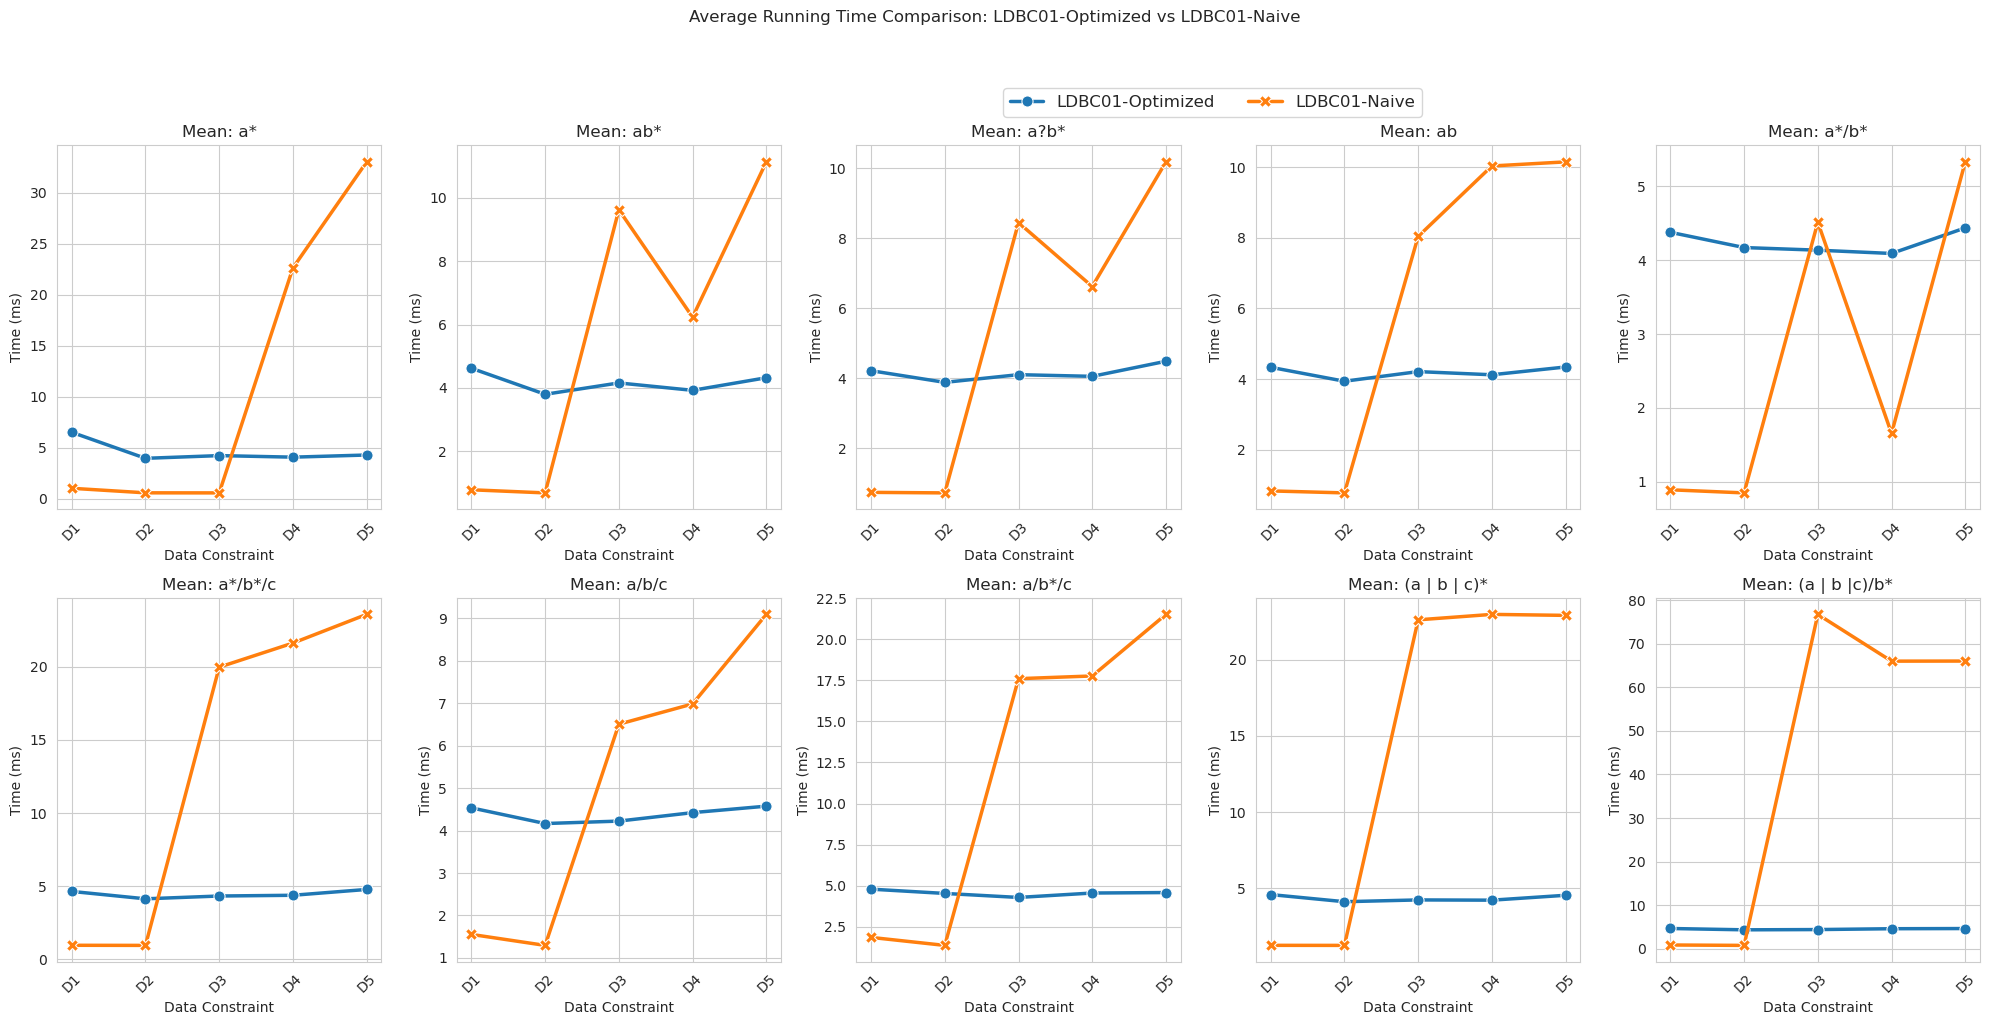

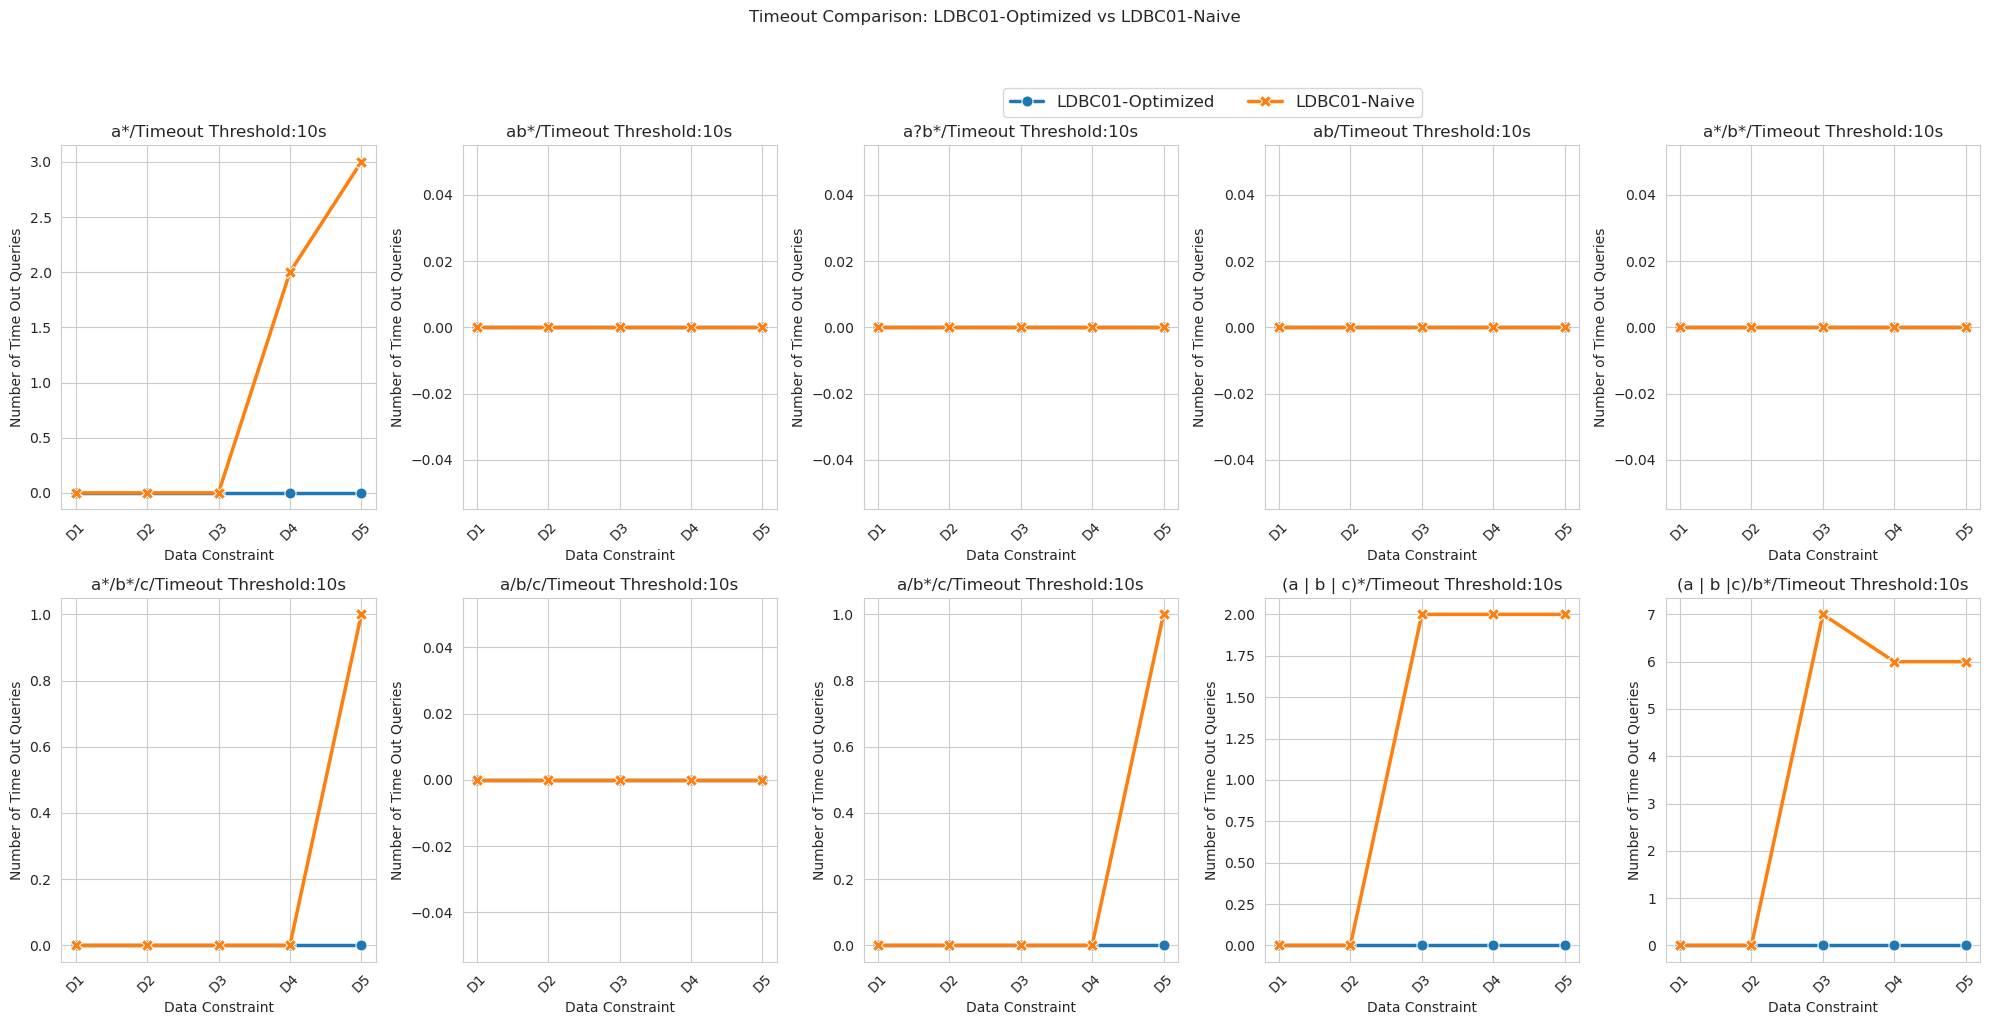

In [35]:
plot_compare("optimized-100/ldbc01/ldbc01_static.pkl", "naive/ldbc01/ldbc01_static_naive.pkl", "LDBC01", 10)

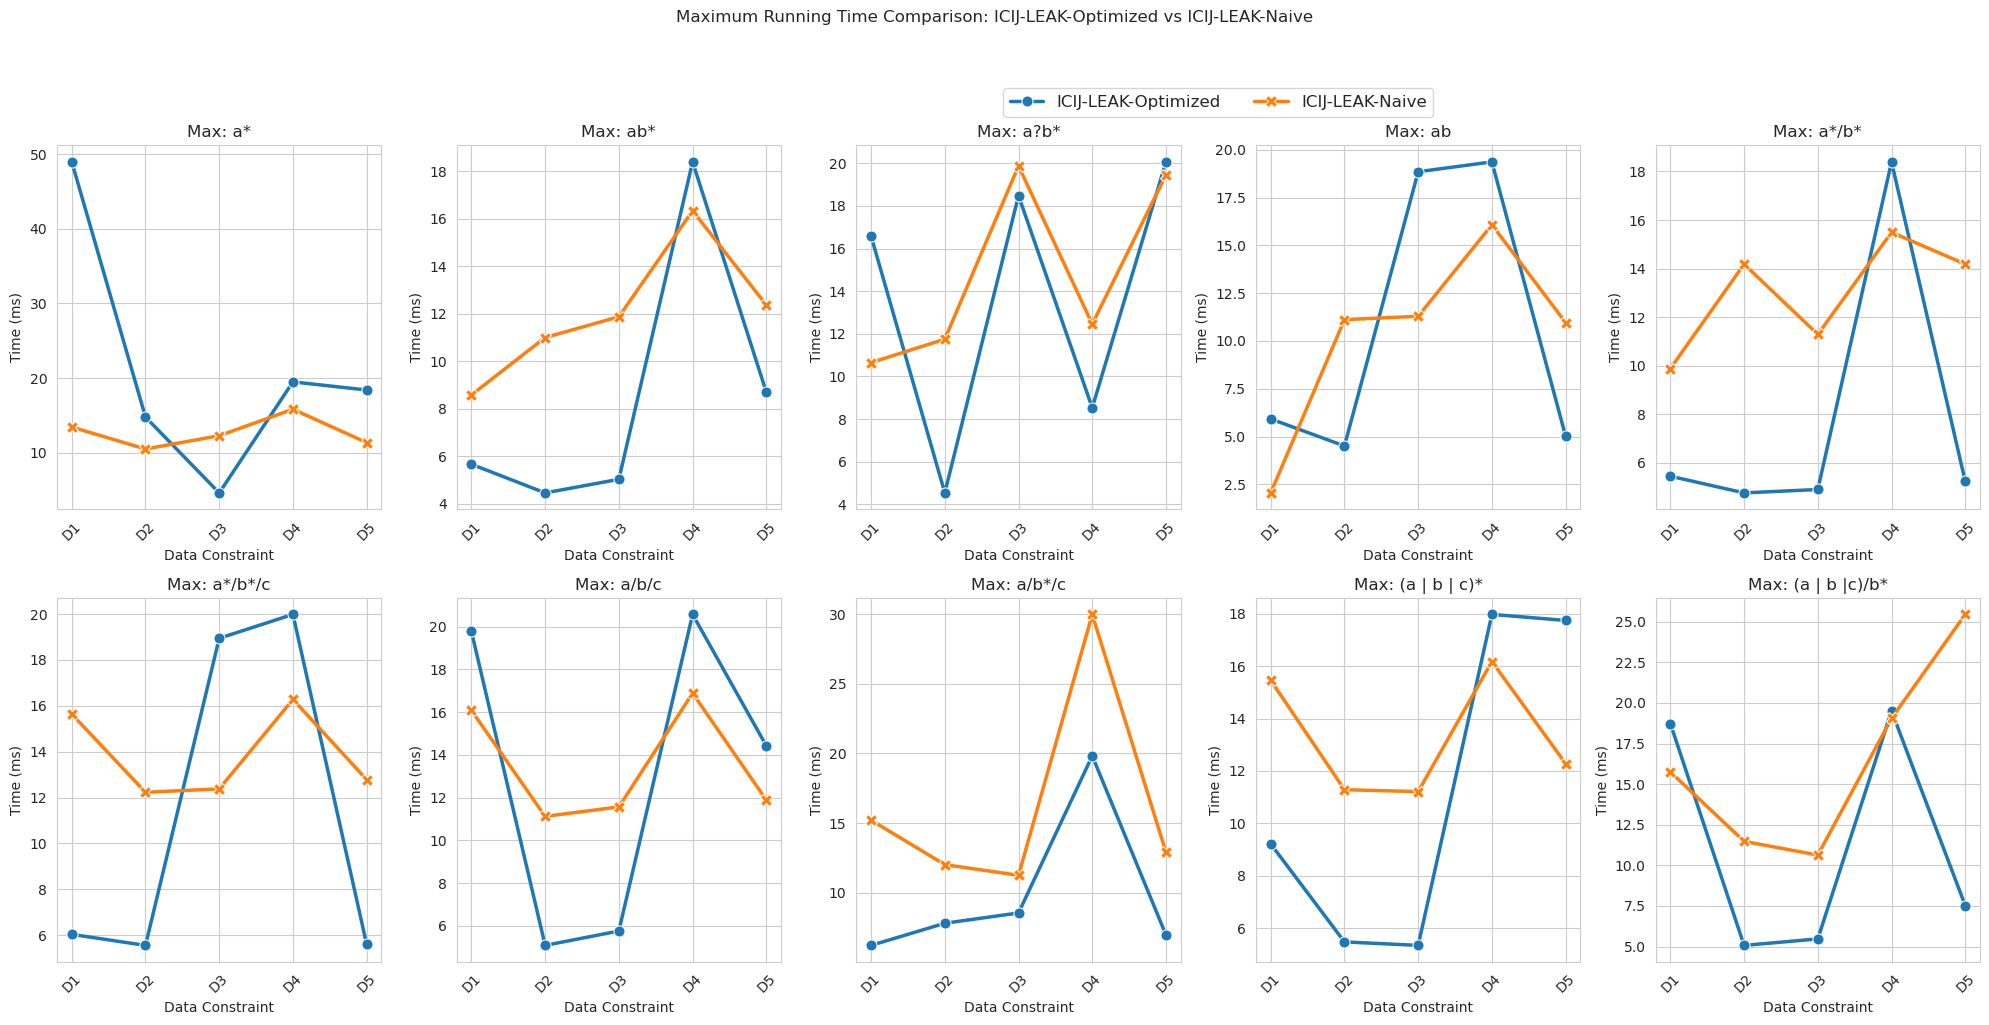

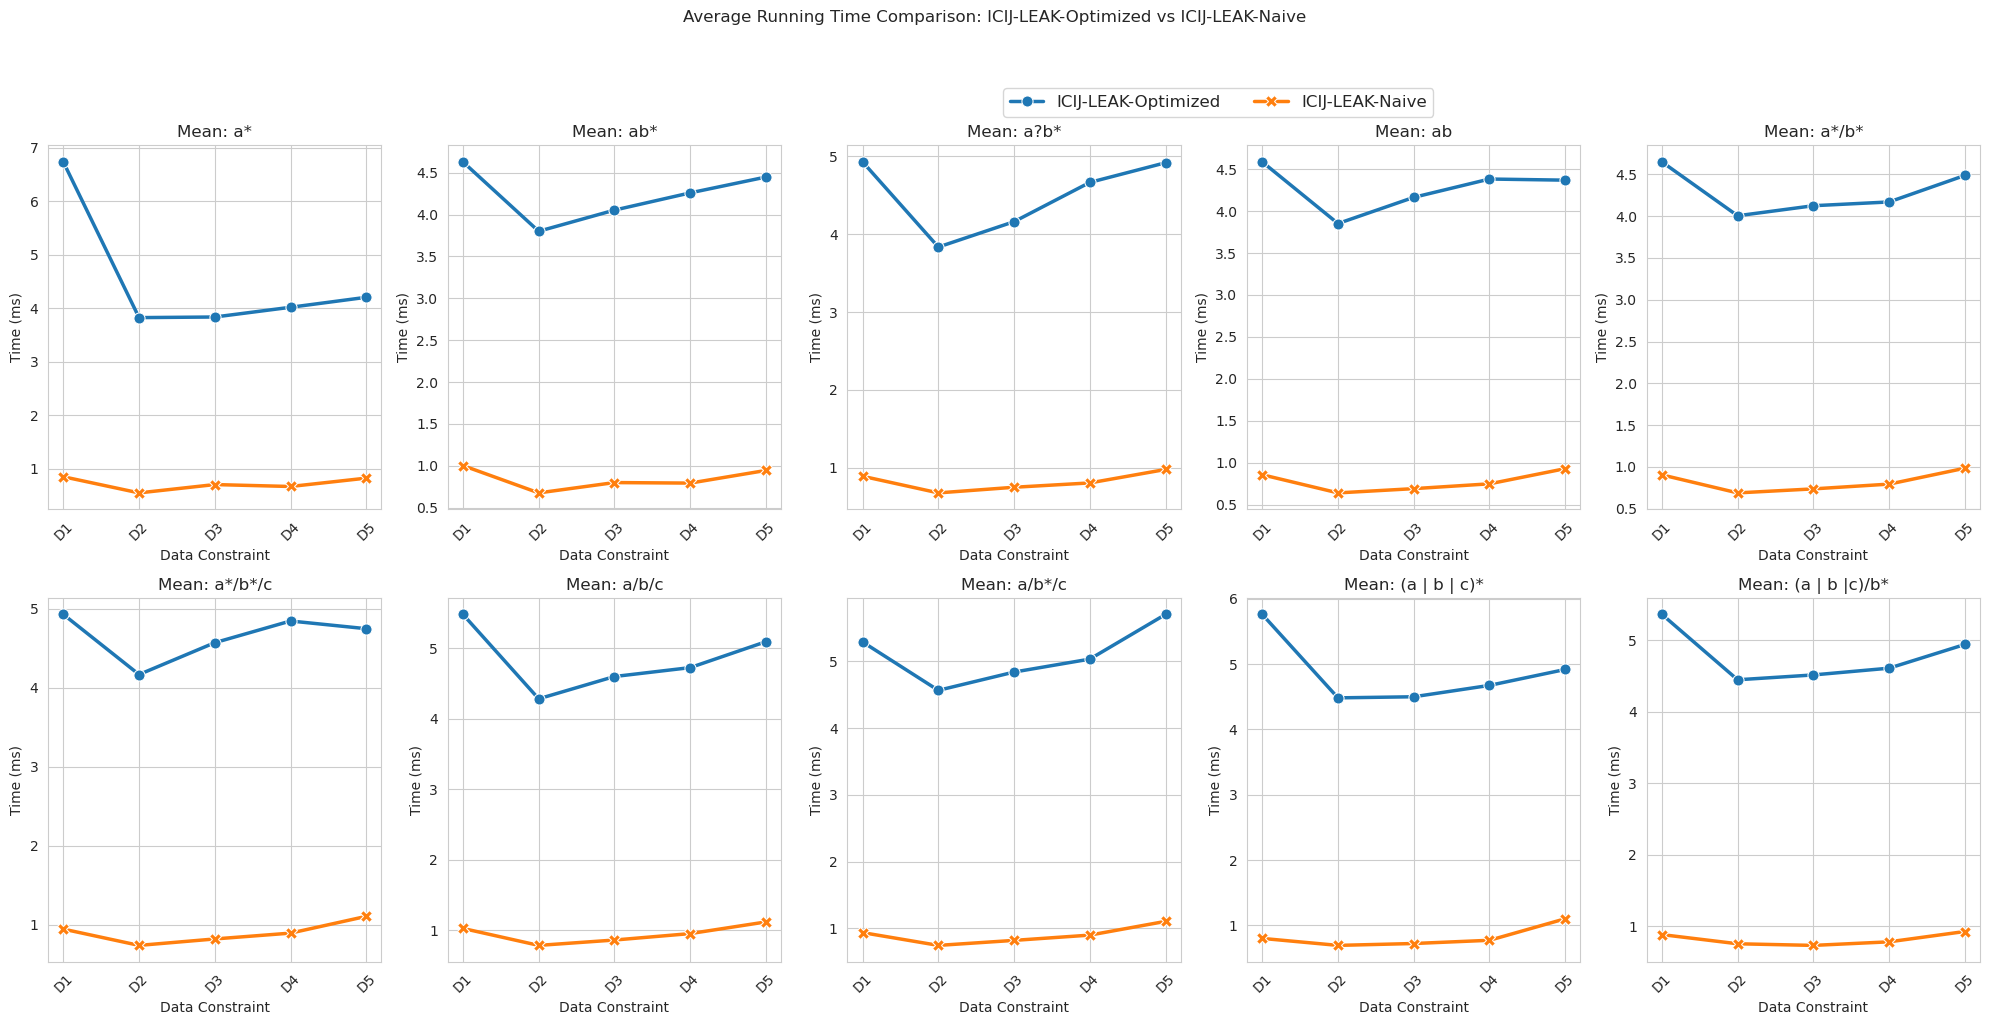

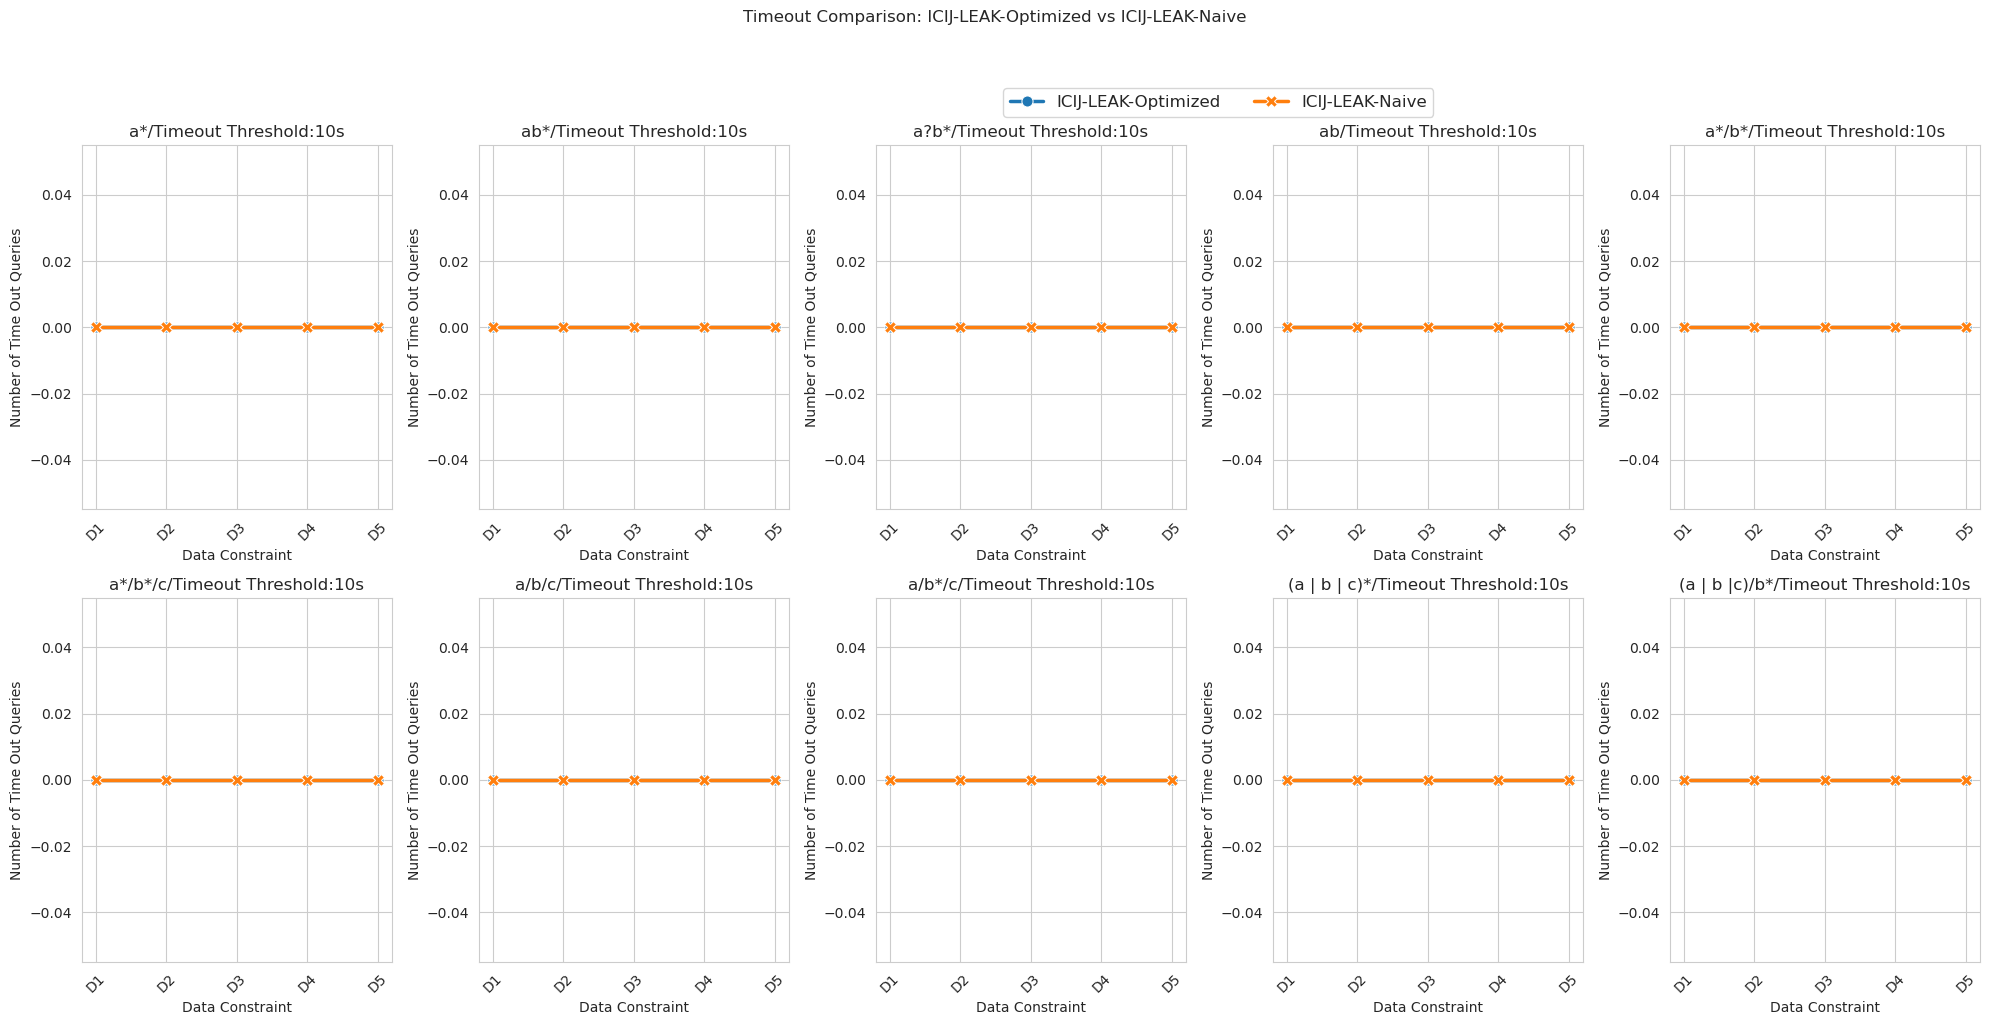

In [36]:
plot_compare("optimized-100/icij-leak/icij_leak_static.pkl", "naive/icij-leak/icij_leak_naive_static.pkl", "ICIJ-LEAK", 10)

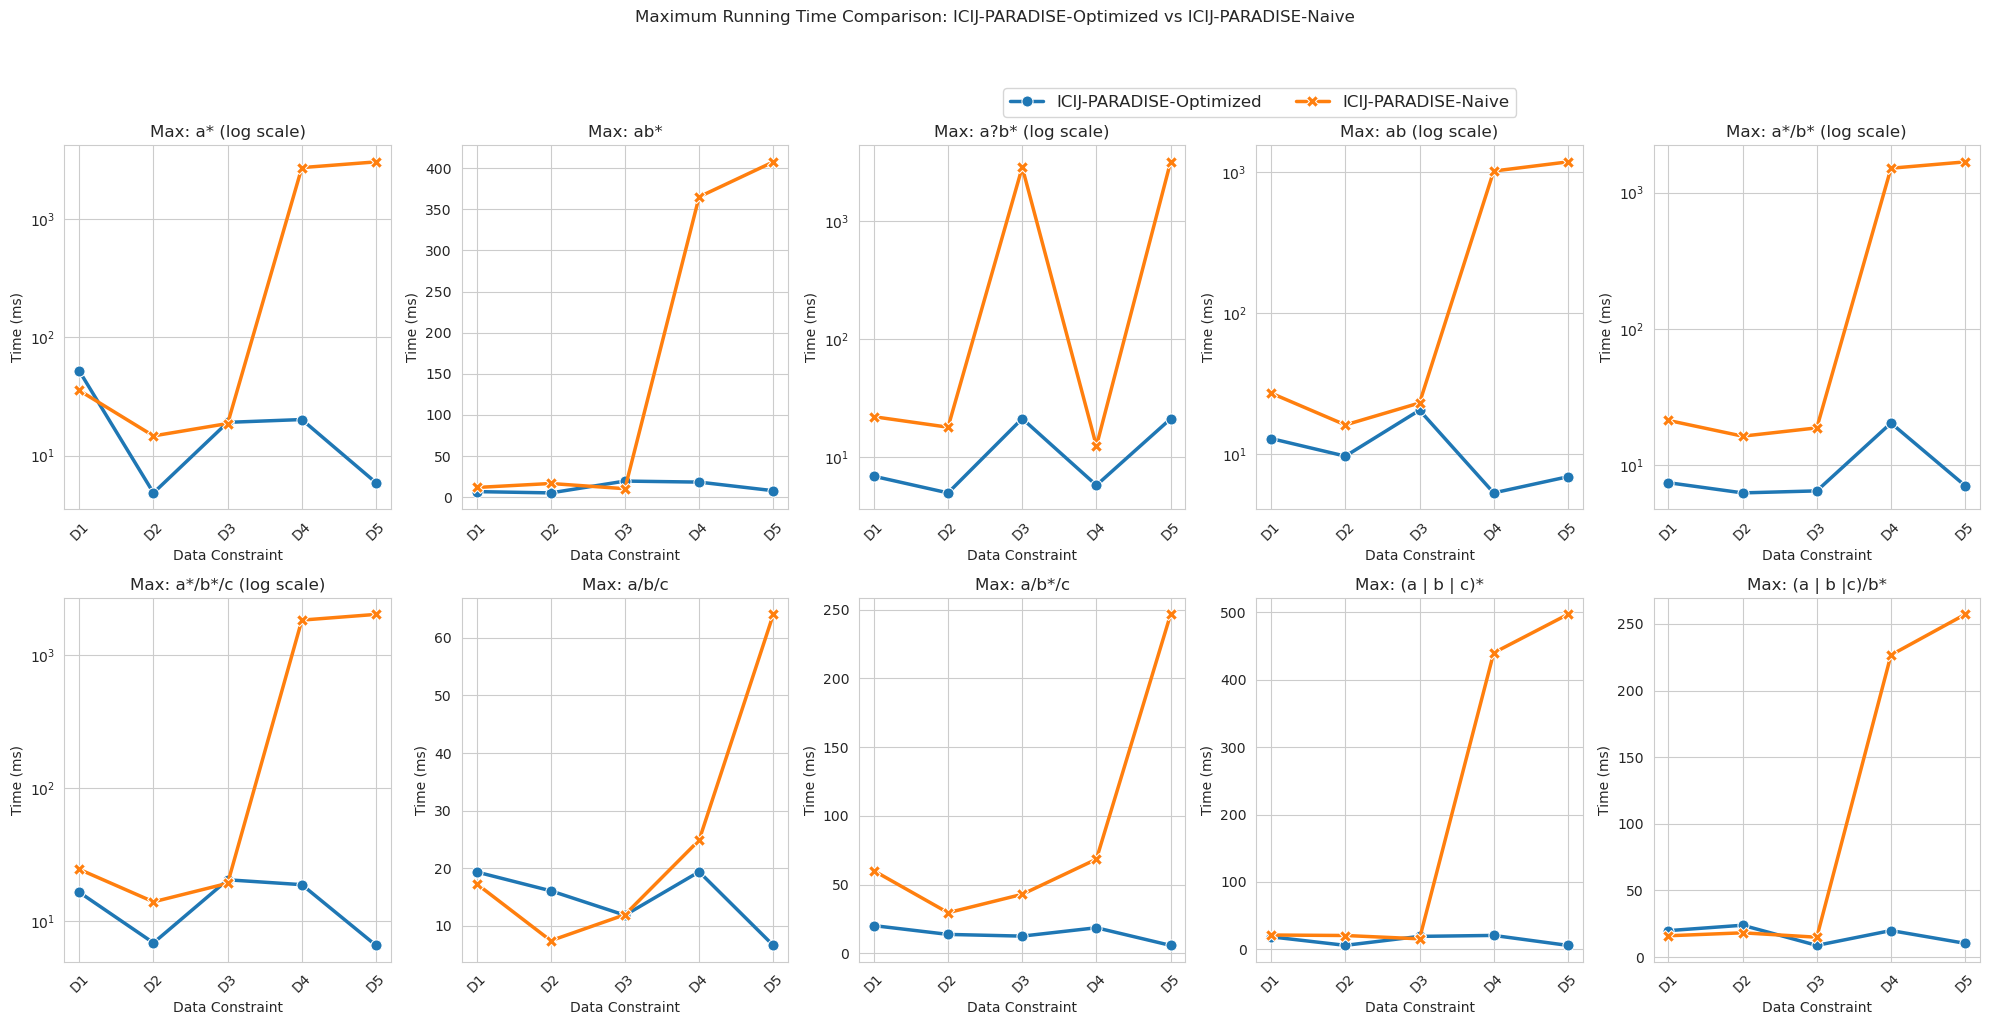

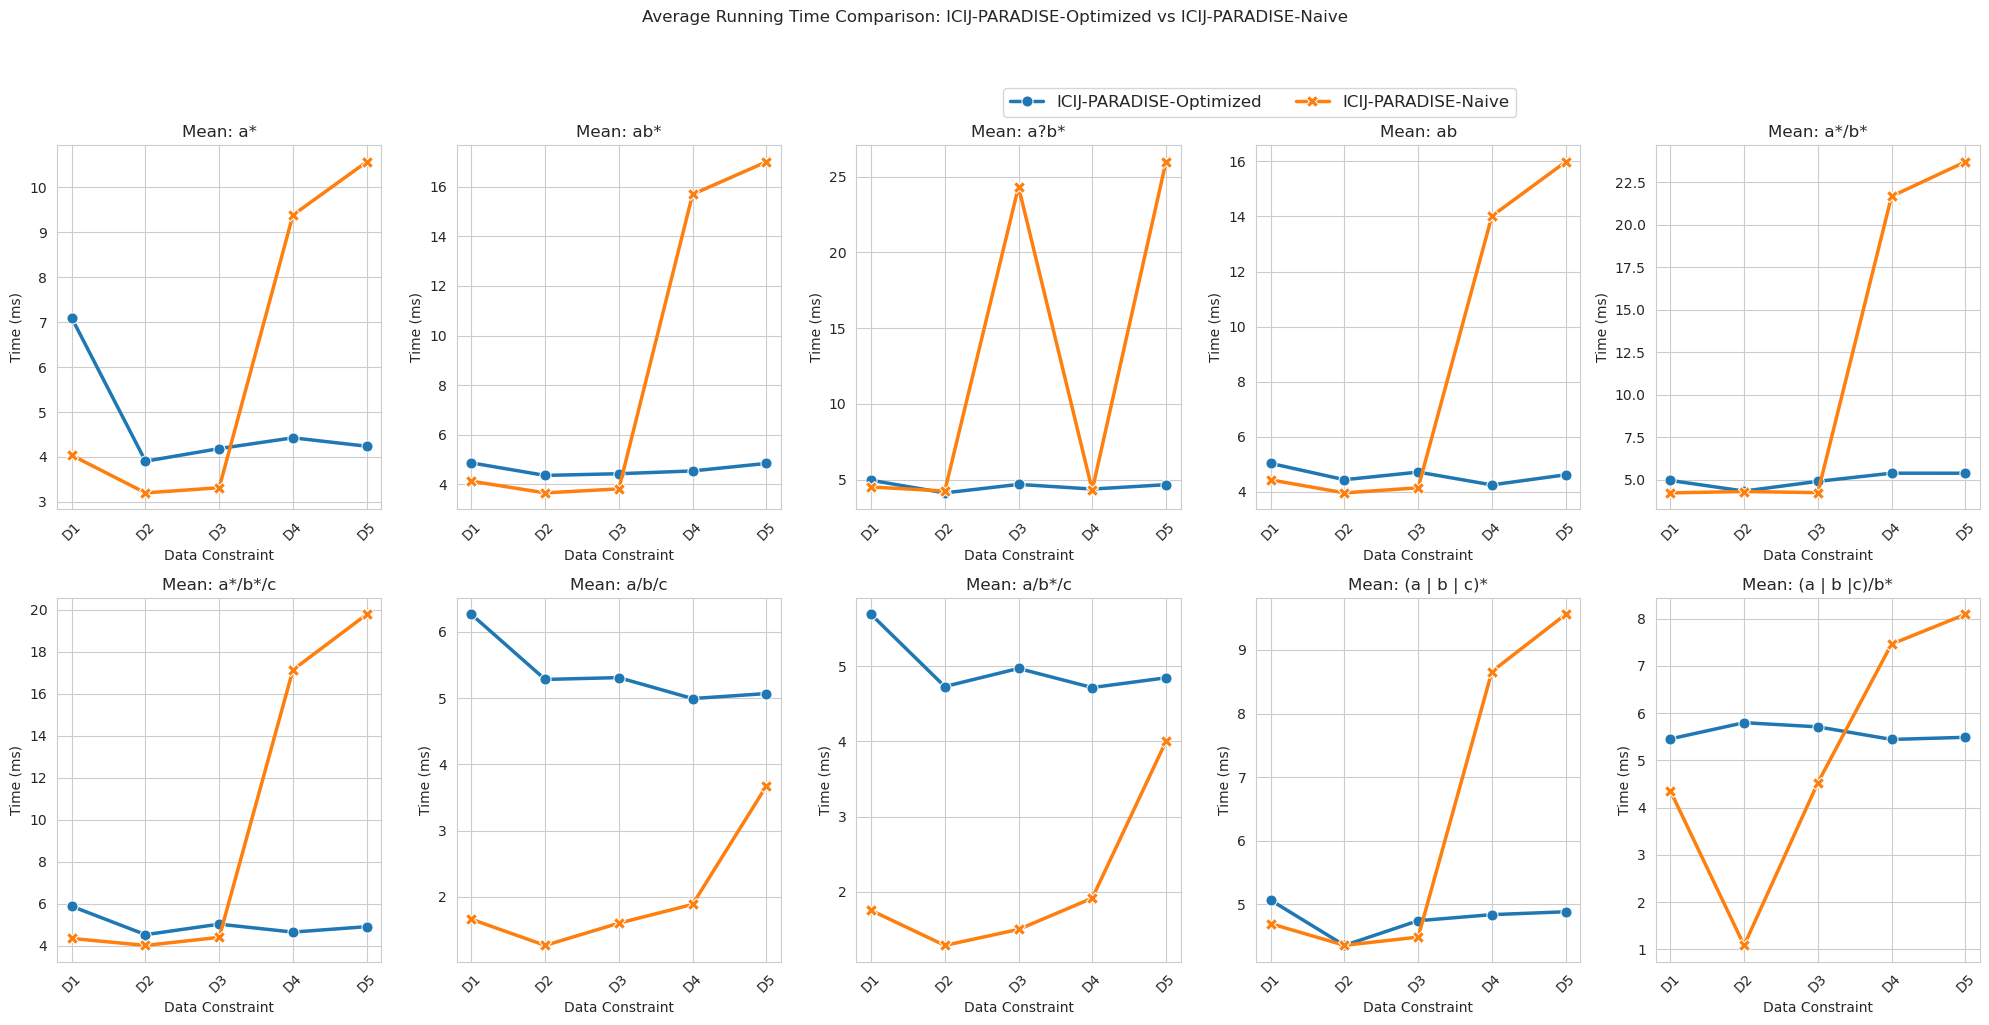

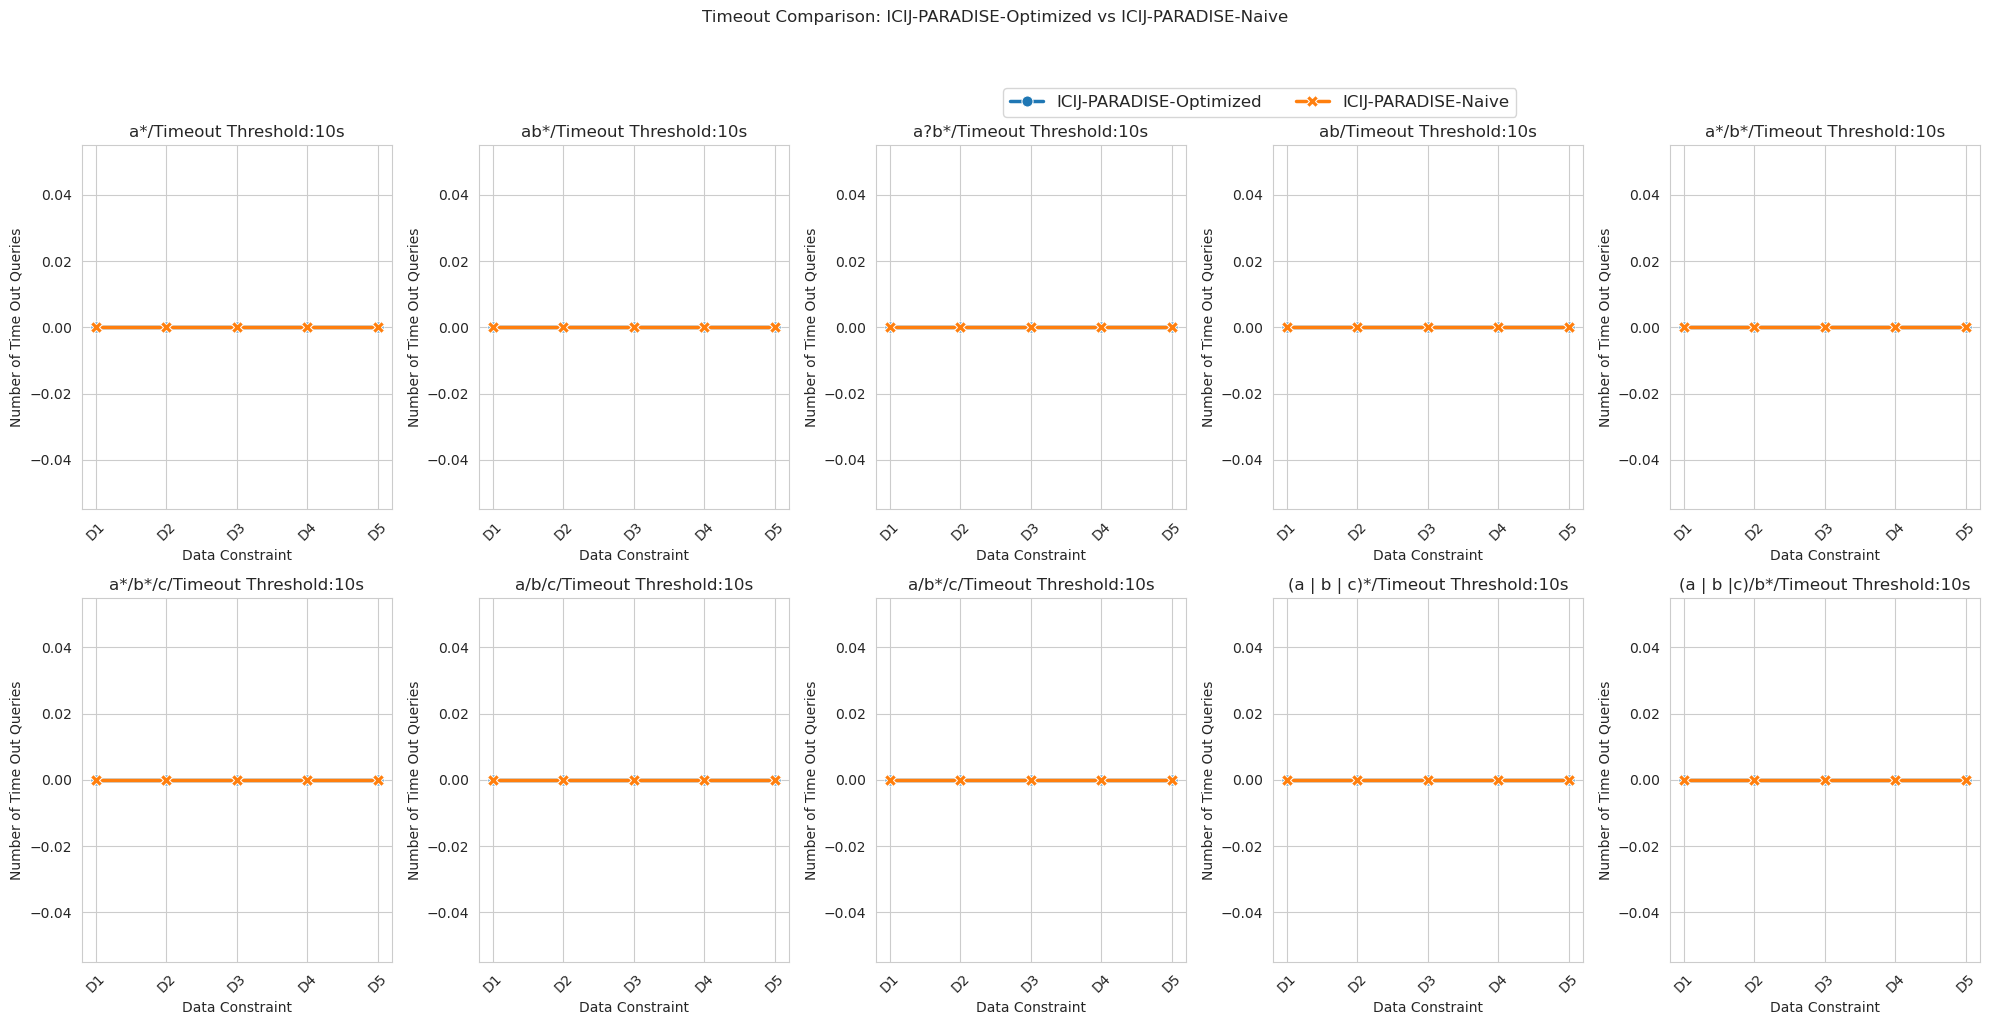

In [37]:
plot_compare("optimized-100/paradise/icij_paradise_static.pkl", "naive/paradise/icij_paradise_naive_static.pkl", "ICIJ-PARADISE", 10)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import *
from matplotlib.cm import get_cmap
from collections import Counter
# 示例数据生成（q1-q10，D1-D5）
# np.random.seed(42)
# d = {f'q{i}': {f'D{j}': np.random.randint(1, 6, size=np.random.randint(3, 8)) 
#               for j in range(1, 6)} for i in range(1, 11)}
queries =  {
    1: "a*",
    2: "ab*",
    3: "a?b*",
    4: "ab",
    5: "a*/b*",
    6: "a*/b*/c",
    7: "a/b/c",
    8: "a/b*/c",
    9: "(a | b | c)*", 
    10: "(a | b |c)/b*"
}

def slice_small_log(path):
    f  = open(path, "rb+") 
    count = 0 
    res = []
    d = {}
    for q in queries.items():
        d[f"{q[1]}"] = {}
    for line in f:
        if "exploration_depth" in line.decode('utf-8'):
            res.append(int(line.decode('utf-8').split(":")[1].strip()))
    for i in range(10):
        for j in range(5):
            d[f"{queries[i+1]}"][f"D{j+1}"] = res[i*5000 + j*1000: i* 5000 + (j+1)*1000]
    return d 

def slice_large_log(path):
    f  = open(path, "rb+") 
    count = 0 
    res = []
    d = {}
    for q in queries.items():
        d[f"{q[1]}"] = {}
    for line in f:
        if "exploration_depth" in line.decode('utf-8'):
            res.append(int(line.decode('utf-8').split(":")[1].strip()))
    for i in range(10):
        for j in range(5):
            d[f"{queries[i+1]}"][f"D{j+1}"] = res[i*50000 + j*10000: i* 50000 + (j+1)*10000]
    return d 

def plot_memory(d, name, log_scale=False):
    all_d_keys = sorted(d.keys())
    # Academic-friendly color scheme
    colors = get_cmap('Set2').colors[:len(all_d_keys)]

    # Create subplot grid
    n_cols = 2
    n_rows = int(np.ceil(len(d) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
    axes = axes.flatten() if len(d) > 1 else [axes]

    # Create histograms for each q
    for i, (q_key, q_data) in enumerate(d.items()):
        ax = axes[i]
        d_keys = sorted(q_data.keys())
        n_groups = len(d_keys)
        
        # Get all data points for this subplot
        current_data = np.concatenate([np.array(d_data) for d_data in q_data.values()], 99)
        if len(current_data) == 0:
            continue
            
        # Calculate bins specific to this subplot's data
        min_val = np.min(current_data)
        max_val = np.max(current_data)
        data_range = max_val - min_val
        bins = np.linspace(min_val * 0.9, max_val * 1.1, 10)
        bin_width = bins[1] - bins[0]
        bar_width = bin_width / (n_groups + 1)  # +1 for spacing
        
        for j, d_key in enumerate(d_keys):
            data = q_data[d_key]
            # Calculate bar positions offset for each group
            offsets = bins[:-1] + j * bar_width
            counts, _ = np.histogram(data, bins=bins)
            
            ax.bar(offsets, counts, width=bar_width, 
                  color=colors[j], alpha=0.7,
                  edgecolor='white', linewidth=0.5,
                  label=d_key)
        
        # # Mark the maximum value for this subplot
        # ax.axvline(x=max_val, color='red', linestyle='--', 
        #           alpha=0.7, linewidth=1.5)
        # ax.text(max_val, ax.get_ylim()[1]*0.95, f'Max: {max_val:.1f}',
        #        rotation=90, va='top', ha='right',
        #        color='red', fontsize=9, bbox=dict(facecolor='white', alpha=0.7))
        
        # Formatting
        ax.set_title(q_key, pad=10)
        ax.set_xlabel('The Cardinality of Search Tree' if i >= (n_rows-1)*n_cols else '')
        ax.set_ylabel('Count' if i % n_cols == 0 else '')
        
        # Set x-axis ticks based on this subplot's range
        ax.xaxis.set_major_locator(MultipleLocator(max(1, data_range/5)))
        ax.xaxis.set_minor_locator(MultipleLocator(max(0.1, data_range/10)))
        
        if log_scale:
            ax.set_yscale('log')
            
            # Calculate the required ymin to position 10^0 at 2mm from bottom
            fig_width, fig_height = fig.get_size_inches()
            ax_pos = ax.get_position()
            ax_height_inches = fig_height * ax_pos.height
            mm_to_inches = 2 / 25.4  # Convert 2mm to inches
            
            # Calculate required ratio of 10^0 position to axis height
            desired_ratio = mm_to_inches / ax_height_inches
            
            # Get current axis limits in log space
            current_ymin, current_ymax = ax.get_ylim()
            log_ymin, log_ymax = np.log10(current_ymin), np.log10(current_ymax)
            
            # Calculate new log_ymin that positions 10^0 (log10(1)=0) at desired height
            log_range = log_ymax - 0  # Distance from 10^0 to top
            required_log_range = log_range / (1 - desired_ratio)
            new_log_ymin = 0 - (required_log_range - log_range)
            
            # Convert back to linear scale and set limits
            new_ymin = 10**new_log_ymin
            ax.set_ylim(bottom=new_ymin, top=current_ymax)
            
            # Add visual reference line at y=1
            ax.axhline(y=1, color='gray', linestyle=':', alpha=0.5, linewidth=0.8)
            
            # Improve tick formatting
            ax.yaxis.set_major_locator(LogLocator(base=10, numticks=8))
            ax.yaxis.set_minor_locator(LogLocator(base=10, subs=np.arange(0.1,1,0.1), numticks=10))
            ax.yaxis.set_major_formatter(ScalarFormatter())
            ax.yaxis.set_minor_formatter(NullFormatter())
            
            # Add margin to prevent clipping
            ax.set_ylim(bottom=new_ymin*0.9, top=current_ymax*1.1)
  
        ax.grid(True, which='both', alpha=0.2, linestyle='--')
        
        # Only show legend in first subplot
        if i == 0:
            ax.legend(frameon=True, framealpha=0.9, 
                     bbox_to_anchor=(1.05, 1), 
                     loc='upper left')

    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout(pad=2.0, h_pad=1.5, w_pad=1.0)

    # 保存为高分辨率图片（适合论文）
    plt.savefig(f'figure/{name}_cardinality.svg', bbox_inches='tight', dpi=300)
    plt.show()

def plot_large_dataset(path, name, log_scale=False):
    d = slice_large_log(path)
    plot_memory(d, name, log_scale=log_scale)

def plot_small_dataset(path, name, log_scale=False):
    d = slice_small_log(path)
    plot_memory(d, name, log_scale=log_scale)

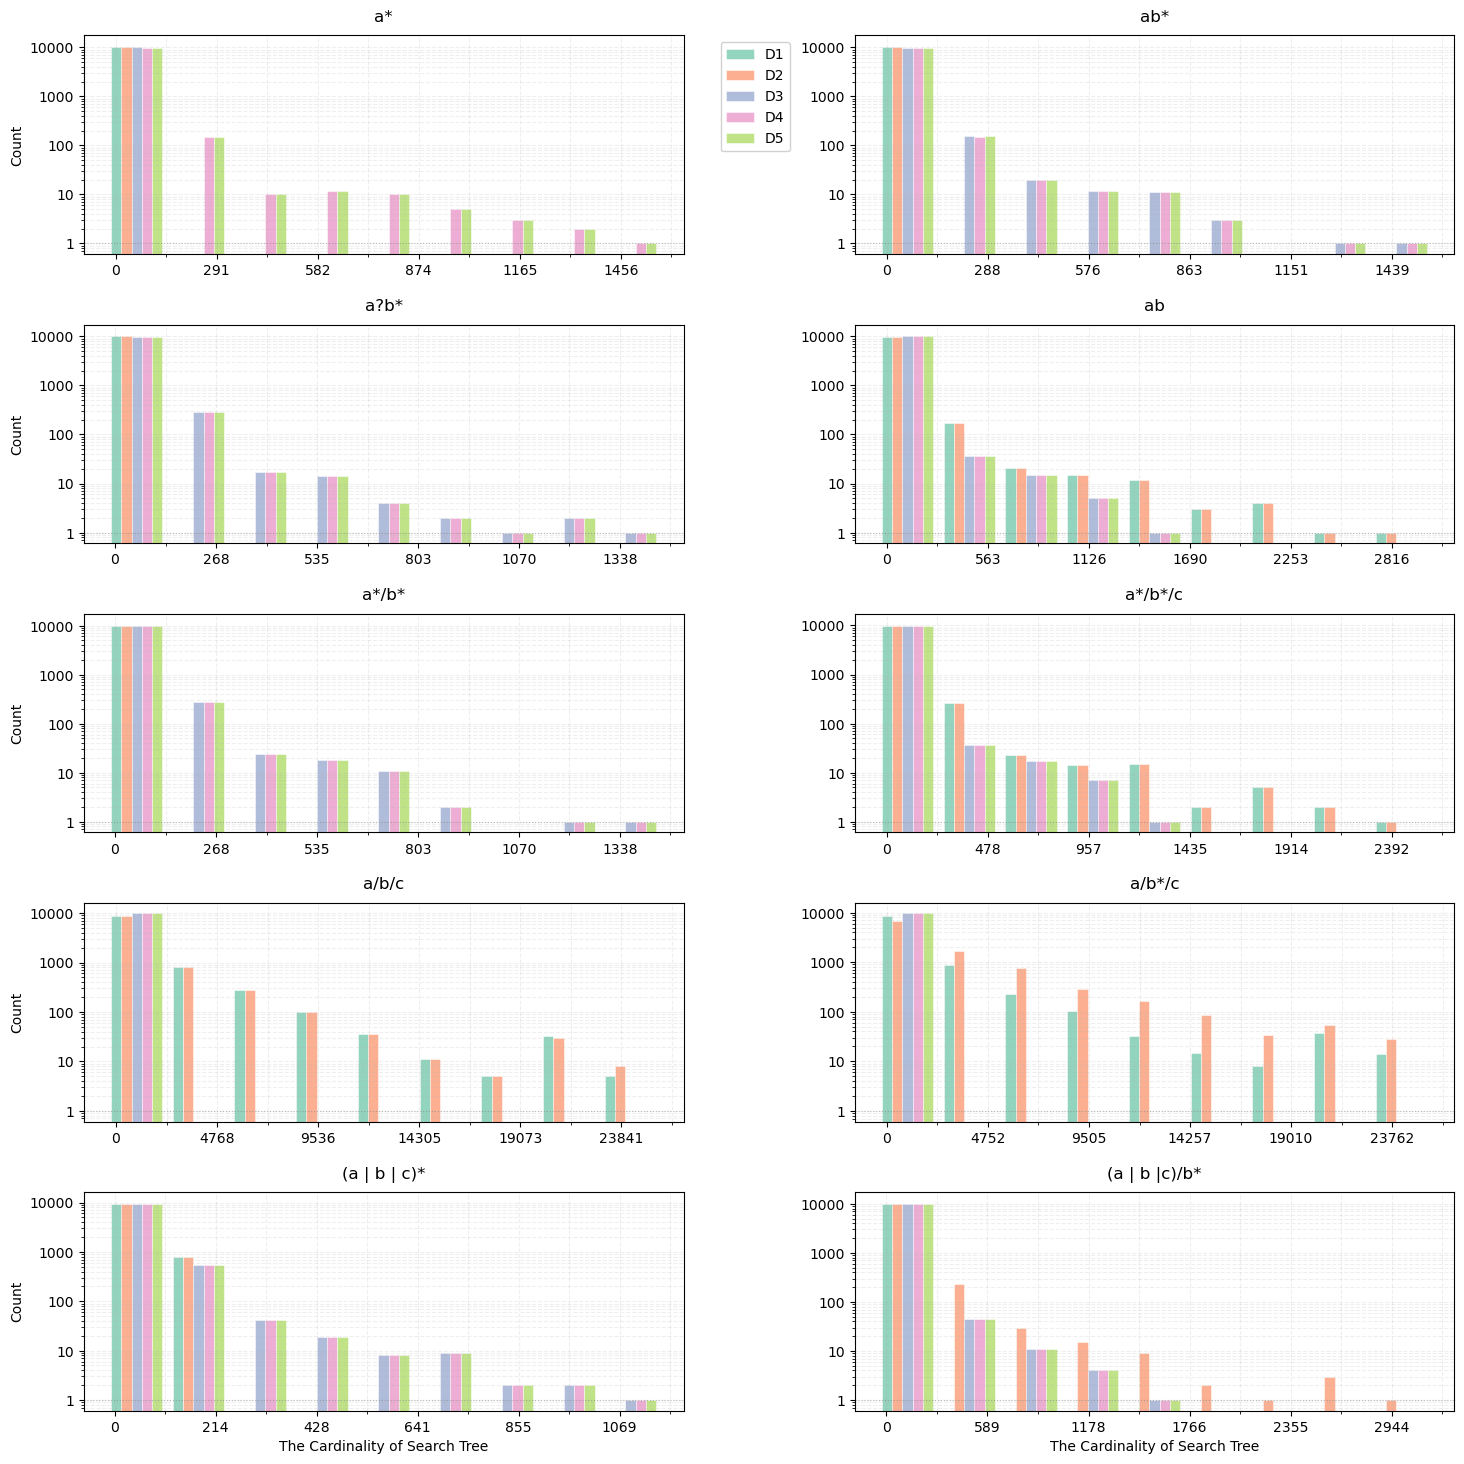

In [5]:
plot_large_dataset("ldbc10/z3_debug.log", 'ldbc10', log_scale=True)


// Nodes with ID and optional properties
.decl Node(id: symbol, name: symbol, age: number)
Node("n1", "Alice", 25).  // Node n1 has name="Alice", age=25
Node("n2", "Bob", 30).
Edge("n1", "n2", "FRIENDS", 0.8).  


.decl person(id: symbol, name:symbol,  age: number)
.decl friend(x: symbol, y: symbol, label: symbol)
.decl reachable(x: symbol, y: symbol, min_age: number, max_age: number)

// Base case: Direct friends
reachable(x, y, age_x, age_y) :- 
    friend(x, y), 
    person(x, age_x),
    person(y, age_y).

// Recursive case: Propagate min/max age
reachable(x, z, min_age_x, max_age_z) :-
    friend(x, y),
    reachable(y, z, min_age_y, max_age_y),
    person(x, age_x),
    min_age_x = min(age_x, min_age_y),
    max_age_z = max(age_x, max_age_y),
    max_age_z - min_age_x <= 7.